<a href="https://colab.research.google.com/github/ElatmaniOumaima/MachineLearning/blob/main/ELATMANI_OUMAIMA_MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Le Programme de Surveillance, d'Épidémiologie et des Résultats Finaux (SEER) de l'Institut National du Cancer recueille et compile des données import sur l'incidence du cancer, sa prévalence et la survie aux États-Unis. Ces données riches fournissent un aperçu détaillé des caractéristiques démographiques des patients, des stades de cancer, des traitements et des résultats cliniques.

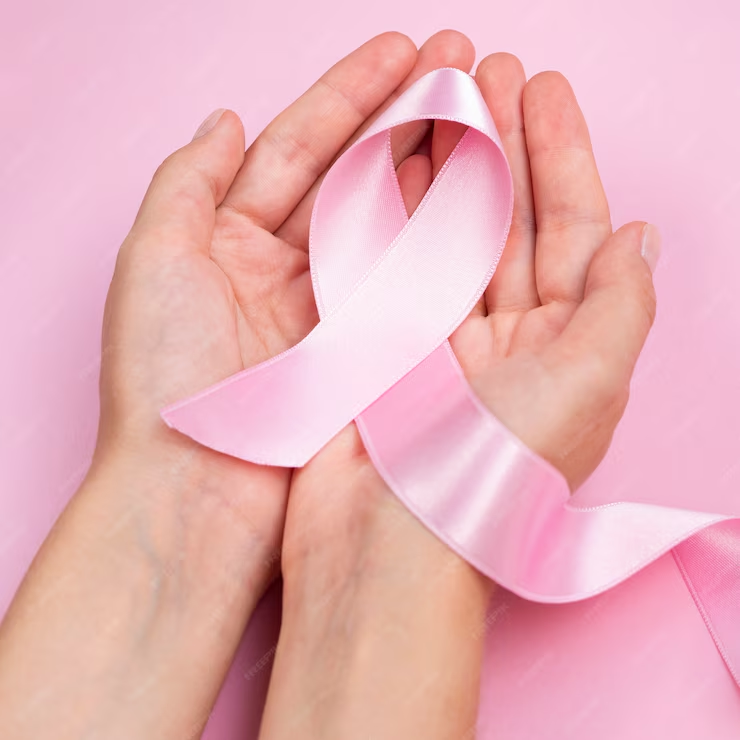

# Objectifs du projets
Dans le cadre de ce projet, nous nous penchons sur l'analyse de la survie au cancer en utilisant les données fournies par le programme SEER. Notre objectif est de développer des modèles prédictifs qui pourraient aider à évaluer la survie des patients atteints de cancer en fonction de divers facteurs tels que l'âge, le stade du cancer, les traitements reçus et d'autres caractéristiques pertinentes.

#Data explaination:
1. Âge : L'âge de l'individu au moment du diagnostic.
2. Race : L'origine raciale ou ethnique de l'individu.
3. État civil : Le statut matrimonial de l'individu, tel que marié, célibataire, divorcé ou veuf.
4. Stade T : Décris la taille et l'étendue de la tumeur primaire (T) dans le sein.
5. Stade N : Indique si le cancer s'est propagé aux ganglions lymphatiques voisins (N) de l'aisselle (aisselle).
6. Stade 6 : Référence au stade global du cancer du sein selon la 6ème édition du système de stadification du cancer de l'American Joint Committee on Cancer (AJCC).
7. Différenciation : Cela pourrait faire référence au grade de la tumeur, qui évalue dans quelle mesure les cellules cancéreuses ressemblent aux cellules normales sous un microscope.
8. Grade : Le grade de la tumeur indique à quel point les cellules cancéreuses sont anormales sous un microscope et à quelle vitesse la tumeur est susceptible de se développer et de se propager.
9. Stade A : Similaire au Stade T et au Stade N, le Stade A fait probablement référence à un autre aspect de la stadification du cancer, probablement lié à l'étendue de la maladie et au pronostic.
10. Taille de la tumeur : La taille de la tumeur primaire dans le sein, généralement mesurée en centimètres.
11. Statut des œstrogènes : Indique si les cellules cancéreuses ont des récepteurs pour l'hormone œstrogène.
12. Statut de la progestérone : Similaire au statut des œstrogènes, le statut des récepteurs de la progestérone indique si les cellules cancéreuses ont des récepteurs pour l'hormone progestérone.
13. Ganglion lymphatique régional examiné : Le nombre de ganglions lymphatiques régionaux examinés lors de la chirurgie pour déterminer la participation des ganglions lymphatiques.
14. Régional Nœud Positif : Indique si le cancer s'est propagé aux ganglions lymphatiques régionaux.
15. Mois de survie : Le nombre de mois survécus après le diagnostic.
16. Statut : Indique le statut actuel de l'individu, probablement s'il est en vie ou décédé au moment de la collecte ou de l'analyse des données.

#Data preprocessing

##Data cleaning

explorer la structure des données en identifiant les relations entre les variables .

In [ ]:
!pip install factor-analyzer

Importation des bibliothèques necessaires

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
files.upload()

Saving Breast_Cancer.csv to Breast_Cancer (1).csv


{'Breast_Cancer (1).csv': b'Age,Race,Marital Status,T Stage ,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status\r\n68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive\r\n50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive\r\n58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive\r\n58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive\r\n47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive\r\n51,White,Single ,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive\r\n51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive\r\n40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Posi

Importation du dataset

In [ ]:
df=pd.read_csv("Breast_Cancer.csv")

In [ ]:
df1=df.copy()

afficher les premières et dernières lignes du DataFrame

In [ ]:
df

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

afficher une liste contenant les noms des colonnes du DataFrame

In [ ]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

afficher un résumé concis des informations sur le DataFrame,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Afficher un résumé statistique des données numériques dans le DataFrame

In [ ]:
df.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

Afficher le nombre de lignes et de colonnes dans votre DataFrame

In [ ]:
df.shape

(4024, 16)

### On affiche les modlités prenantes par les variables catégoriales

In [ ]:
df["Race"].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [ ]:
df["Marital Status"].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [ ]:
df['T Stage '].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [ ]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [ ]:
df['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [ ]:
df["differentiate"].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [ ]:
df['Grade'].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [ ]:
df['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [ ]:
df['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

##Data transformation and data formatting:

Encoder les colonnes catégoriels

In [ ]:
## on formatte notre categoriale variables
##on definit une fonction
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
def encodin(data,categorical_columns):
  for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
encodin(df,df.select_dtypes(include=['object']).columns.tolist())

Afficher le dataframe aprés l'encodage

In [ ]:
df

Age  Race  Marital Status  T Stage   N Stage  6th Stage  differentiate  \
0      68     2               1         0        0          0              1   
1      50     2               1         1        1          2              0   
2      58     2               0         2        2          4              0   
3      58     2               1         0        0          0              1   
4      47     2               1         1        0          1              1   
...   ...   ...             ...       ...      ...        ...            ...   
4019   62     1               1         0        0          0              0   
4020   56     2               0         1        1          2              0   
4021   68     2               1         1        0          1              0   
4022   58     0               0         1        0          1              0   
4023   46     2               1         1        0          1              0   

      Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0         3        1           4                1                    1   
1         2        1          35                1                    1   
2         2        1          63                1                    1   
3         3        1          18                1                    1   
4         3        1          41                1                    1   
...     ...      ...         ...              ...                  ...   
4019      2        1           9                1                    1   
4020      2        1          46                1                    1   
4021      2        1          22                1                    0   
4022      2        1          44                1                    1   
4023      2        1          30                1                    1   

      Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                         24                      1               60       0  
1                         14                      5               62       0  
2                         14                      7               75       0  
3                          2                      1               84       0  
4                          3                      1               50       0  
...                      ...                    ...              ...     ...  
4019                       1                      1               49       0  
4020                      14                      8               69       0  
4021                      11                      3               69       0  
4022                      11                      1               72       0  
4023                       7                      2              100       0  

[4024 rows x 16 columns]

Afficher la matrice de corrélation

In [ ]:
df.corr()

Age      Race  Marital Status  T Stage   \
Age                     1.000000  0.079734        0.050832 -0.066914   
Race                    0.079734  1.000000       -0.111417  0.001082   
Marital Status          0.050832 -0.111417        1.000000  0.009318   
T Stage                -0.066914  0.001082        0.009318  1.000000   
N Stage                 0.002883 -0.032125        0.013168  0.277015   
6th Stage              -0.018741 -0.025282        0.002989  0.606711   
differentiate           0.015697 -0.018759        0.031639 -0.031355   
Grade                  -0.093216 -0.057032       -0.004283  0.110220   
A Stage                 0.020860  0.007005        0.004936 -0.221124   
Tumor Size             -0.077215 -0.004082        0.007407  0.809176   
Estrogen Status         0.059787  0.057652       -0.017895 -0.060954   
Progesterone Status    -0.021269  0.034351       -0.013485 -0.057633   
Regional Node Examined -0.033345 -0.004778       -0.004285  0.114102   
Reginol Node Positive   0.012586 -0.014604        0.005849  0.243075   
Survival Months        -0.009390  0.040571       -0.025593 -0.085718   
Status                  0.055921 -0.050040        0.033289  0.154699   

                         N Stage  6th Stage  differentiate     Grade  \
Age                     0.002883  -0.018741       0.015697 -0.093216   
Race                   -0.032125  -0.025282      -0.018759 -0.057032   
Marital Status          0.013168   0.002989       0.031639 -0.004283   
T Stage                 0.277015   0.606711      -0.031355  0.110220   
N Stage                 1.000000   0.881880      -0.036249  0.148791   
6th Stage               0.881880   1.000000      -0.042286  0.169986   
differentiate          -0.036249  -0.042286       1.000000 -0.365422   
Grade                   0.148791   0.169986      -0.365422  1.000000   
A Stage                -0.260573  -0.291962      -0.008977 -0.043701   
Tumor Size              0.277905   0.513971      -0.028391  0.099539   
Estrogen Status        -0.101995  -0.105614      -0.021826 -0.186770   
Progesterone Status    -0.093723  -0.101246       0.008957 -0.175816   
Regional Node Examined  0.328276   0.317219      -0.057248  0.083446   
Reginol Node Positive   0.838073   0.773963      -0.028339  0.122931   
Survival Months        -0.139577  -0.144837      -0.004500 -0.058408   
Status                  0.255772   0.257636      -0.018513  0.134170   

                         A Stage  Tumor Size  Estrogen Status  \
Age                     0.020860   -0.077215         0.059787   
Race                    0.007005   -0.004082         0.057652   
Marital Status          0.004936    0.007407        -0.017895   
T Stage                -0.221124    0.809176        -0.060954   
N Stage                -0.260573    0.277905        -0.101995   
6th Stage              -0.291962    0.513971        -0.105614   
differentiate          -0.008977   -0.028391        -0.021826   
Grade                  -0.043701    0.099539        -0.186770   
A Stage                 1.000000   -0.123883         0.065570   
Tumor Size             -0.123883    1.000000        -0.059585   
Estrogen Status         0.065570   -0.059585         1.000000   
Progesterone Status     0.026530   -0.069879         0.513308   
Regional Node Examined -0.069010    0.104352        -0.044836   
Reginol Node Positive  -0.232849    0.242322        -0.085985   
Survival Months         0.070109   -0.086901         0.128469   
Status                 -0.096584    0.134205        -0.184650   

                        Progesterone Status  Regional Node Examined  \
Age                               -0.021269               -0.033345   
Race                               0.034351               -0.004778   
Marital Status                    -0.013485               -0.004285   
T Stage                           -0.057633                0.114102   
N Stage                           -0.093723                0.328276   
6th Stage                         -0.101246    

créer des graphiques de dispersion entre différentes colonnes du DataFrame

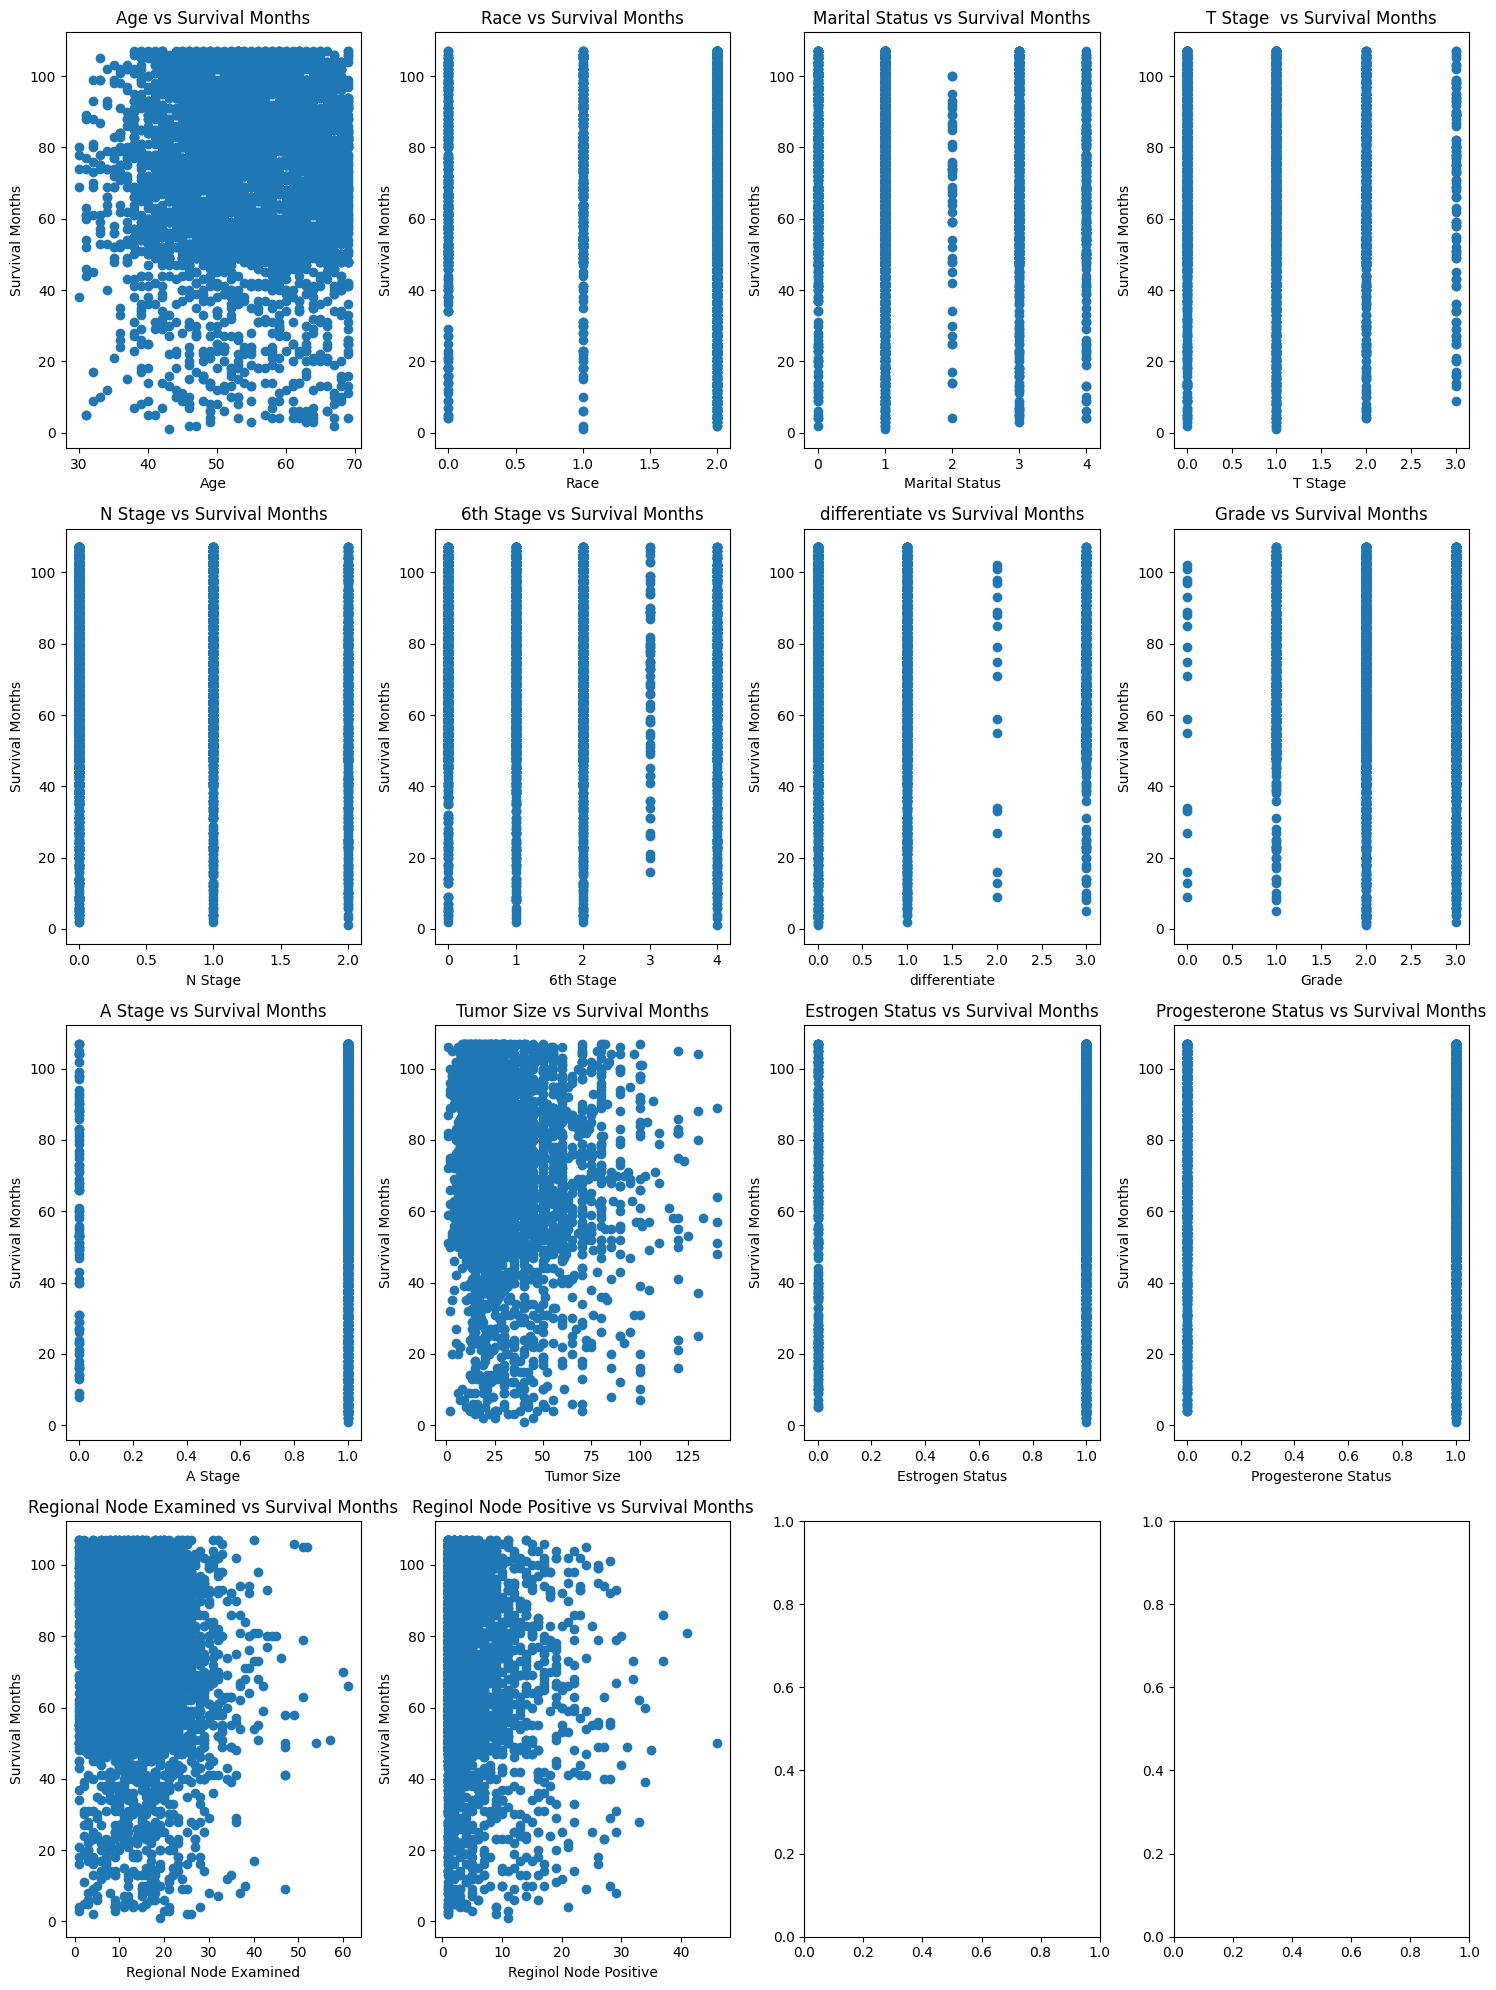

In [ ]:
##we plot the scatter point for the survival months and status to see the data distributions
##we define a function  that when we call it we give it the parameter to plot in sccater plot

def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel(f'X{x.name}')
    plt.ylabel(f'Y-{y.name}')
    plt.title('Scatter Plot')
    plt.show()


def scatter_plots_over_columns(data, target_column):
    num_columns = len(data.columns) - 1  # Exclude the target column
    num_plots_per_row = 4
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row

    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    plt.subplots_adjust(hspace=0.5)

    for i, column in enumerate(data.columns):
        if column == target_column:
            continue  # Skip the target column
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        if row == num_rows - 1 and col >= num_columns % num_plots_per_row:
            # Skip if there are no more columns to plot in the last row
            continue
        axes[row, col].scatter(data[column], data[target_column])
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel(target_column)
        axes[row, col].set_title(f"{column} vs {target_column}")

    plt.tight_layout()
    plt.show()
scatter_plots_over_columns(df, 'Survival Months')

##Feature scalling for continous features

normaliser les colonnes du DataFrame en utilisant l'objet StandardScaler pour standardiser les valeurs

In [ ]:


# Initialize the StandardScaler
scaler = StandardScaler()

def stand(df,col,scaler):
    # Reshape the column to a 2D array
    col_data = df[col].values.reshape(-1, 1)
    # Scale the column
    df[col] = scaler.fit_transform(col_data)




In [ ]:
L=df.select_dtypes(include=['int']).columns.tolist()
for col in L:
  stand(df,col,scaler)

In [ ]:
df.dtypes


Age                       float64
Race                      float64
Marital Status            float64
T Stage                   float64
N Stage                   float64
6th Stage                 float64
differentiate             float64
Grade                     float64
A Stage                   float64
Tumor Size                float64
Estrogen Status           float64
Progesterone Status       float64
Regional Node Examined    float64
Reginol Node Positive     float64
Survival Months           float64
Status                    float64
dtype: object

Réaficher la matrice de corrélation

In [ ]:
df.corr()

Age      Race  Marital Status  T Stage   \
Age                     1.000000  0.079734        0.050832 -0.066914   
Race                    0.079734  1.000000       -0.111417  0.001082   
Marital Status          0.050832 -0.111417        1.000000  0.009318   
T Stage                -0.066914  0.001082        0.009318  1.000000   
N Stage                 0.002883 -0.032125        0.013168  0.277015   
6th Stage              -0.018741 -0.025282        0.002989  0.606711   
differentiate           0.015697 -0.018759        0.031639 -0.031355   
Grade                  -0.093216 -0.057032       -0.004283  0.110220   
A Stage                 0.020860  0.007005        0.004936 -0.221124   
Tumor Size             -0.077215 -0.004082        0.007407  0.809176   
Estrogen Status         0.059787  0.057652       -0.017895 -0.060954   
Progesterone Status    -0.021269  0.034351       -0.013485 -0.057633   
Regional Node Examined -0.033345 -0.004778       -0.004285  0.114102   
Reginol Node Positive   0.012586 -0.014604        0.005849  0.243075   
Survival Months        -0.009390  0.040571       -0.025593 -0.085718   
Status                  0.055921 -0.050040        0.033289  0.154699   

                         N Stage  6th Stage  differentiate     Grade  \
Age                     0.002883  -0.018741       0.015697 -0.093216   
Race                   -0.032125  -0.025282      -0.018759 -0.057032   
Marital Status          0.013168   0.002989       0.031639 -0.004283   
T Stage                 0.277015   0.606711      -0.031355  0.110220   
N Stage                 1.000000   0.881880      -0.036249  0.148791   
6th Stage               0.881880   1.000000      -0.042286  0.169986   
differentiate          -0.036249  -0.042286       1.000000 -0.365422   
Grade                   0.148791   0.169986      -0.365422  1.000000   
A Stage                -0.260573  -0.291962      -0.008977 -0.043701   
Tumor Size              0.277905   0.513971      -0.028391  0.099539   
Estrogen Status        -0.101995  -0.105614      -0.021826 -0.186770   
Progesterone Status    -0.093723  -0.101246       0.008957 -0.175816   
Regional Node Examined  0.328276   0.317219      -0.057248  0.083446   
Reginol Node Positive   0.838073   0.773963      -0.028339  0.122931   
Survival Months        -0.139577  -0.144837      -0.004500 -0.058408   
Status                  0.255772   0.257636      -0.018513  0.134170   

                         A Stage  Tumor Size  Estrogen Status  \
Age                     0.020860   -0.077215         0.059787   
Race                    0.007005   -0.004082         0.057652   
Marital Status          0.004936    0.007407        -0.017895   
T Stage                -0.221124    0.809176        -0.060954   
N Stage                -0.260573    0.277905        -0.101995   
6th Stage              -0.291962    0.513971        -0.105614   
differentiate          -0.008977   -0.028391        -0.021826   
Grade                  -0.043701    0.099539        -0.186770   
A Stage                 1.000000   -0.123883         0.065570   
Tumor Size             -0.123883    1.000000        -0.059585   
Estrogen Status         0.065570   -0.059585         1.000000   
Progesterone Status     0.026530   -0.069879         0.513308   
Regional Node Examined -0.069010    0.104352        -0.044836   
Reginol Node Positive  -0.232849    0.242322        -0.085985   
Survival Months         0.070109   -0.086901         0.128469   
Status                 -0.096584    0.134205        -0.184650   

                        Progesterone Status  Regional Node Examined  \
Age                               -0.021269               -0.033345   
Race                               0.034351               -0.004778   
Marital Status                    -0.013485               -0.004285   
T Stage                           -0.057633                0.114102   
N Stage                           -0.093723                0.328276   
6th Stage                         -0.101246    

Génèrer des graphiques de dispersion pour chaque colonne de type 'float64' dans le DataFrame

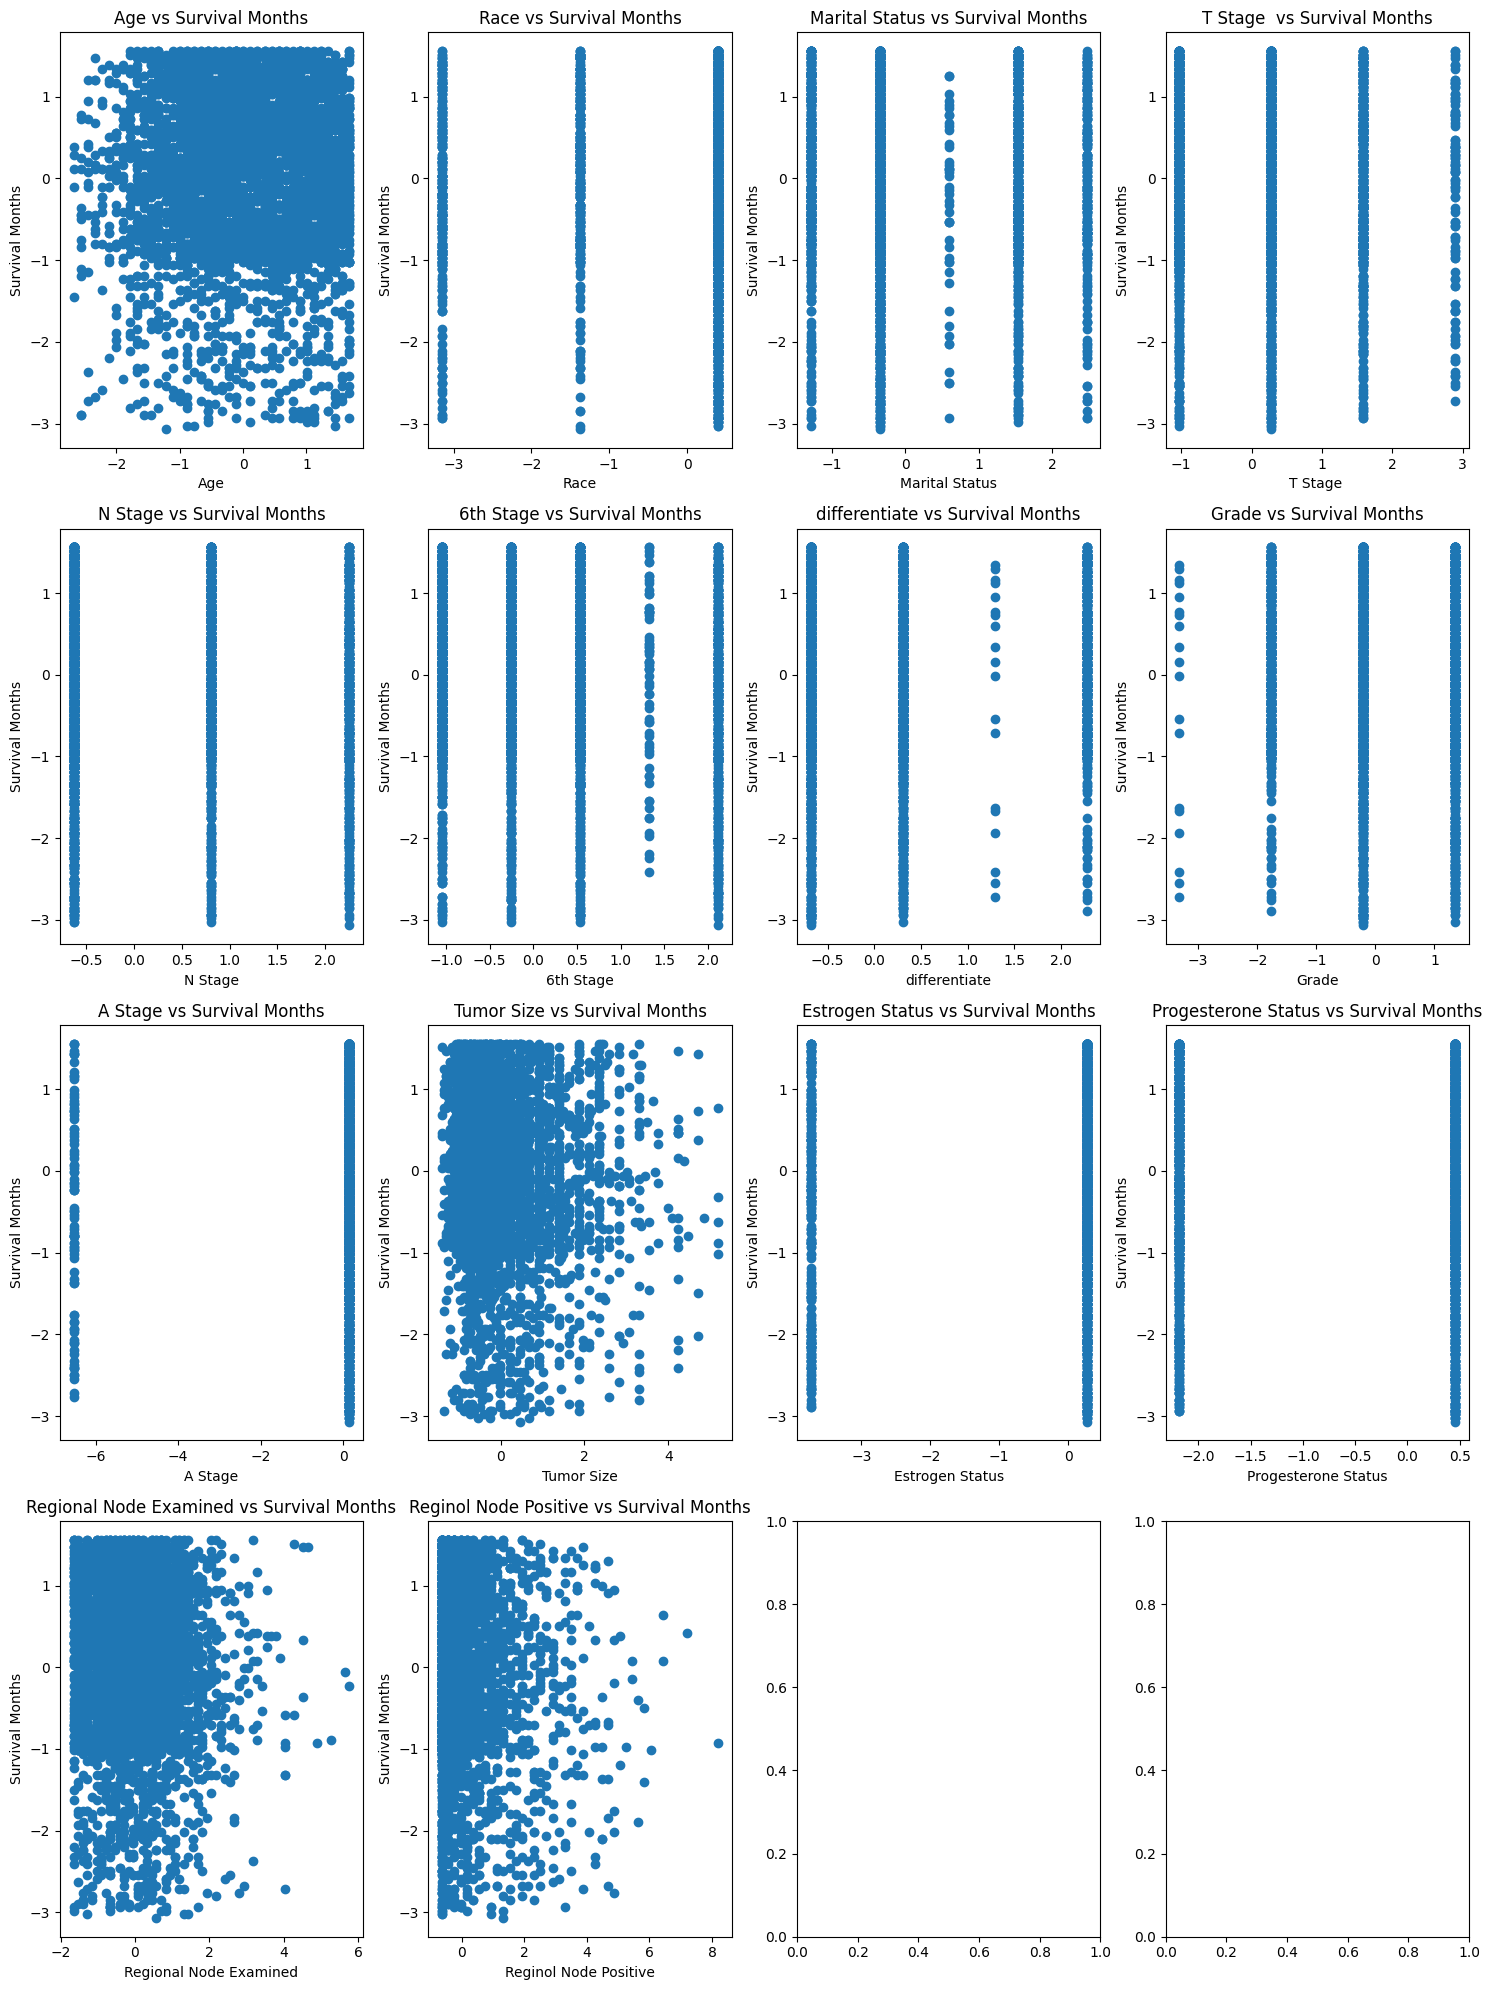

In [ ]:
int_columns = [col for col in df.columns if df[col].dtype == 'float64']
scatter_plots_over_columns(df[int_columns], 'Survival Months')

##data visualization and intrepretation:

visualiser la distribution des données

In [ ]:
##ploting the  frequences of the stages
def plot_stage_frequencies(df, stage_column):
    # Count the frequencies of each stage
    stage_counts = df[stage_column].value_counts()

    # Plot the frequencies
    plt.figure(figsize=(15, 6))
    stage_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Stages {stage_column}')
    plt.xlabel('Stage')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

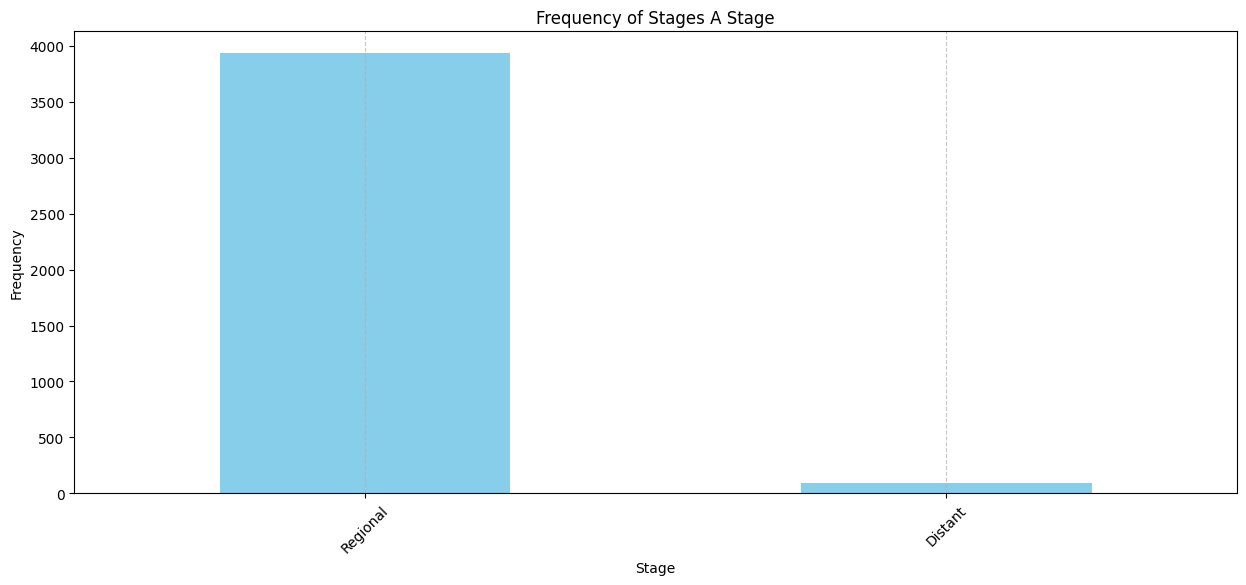

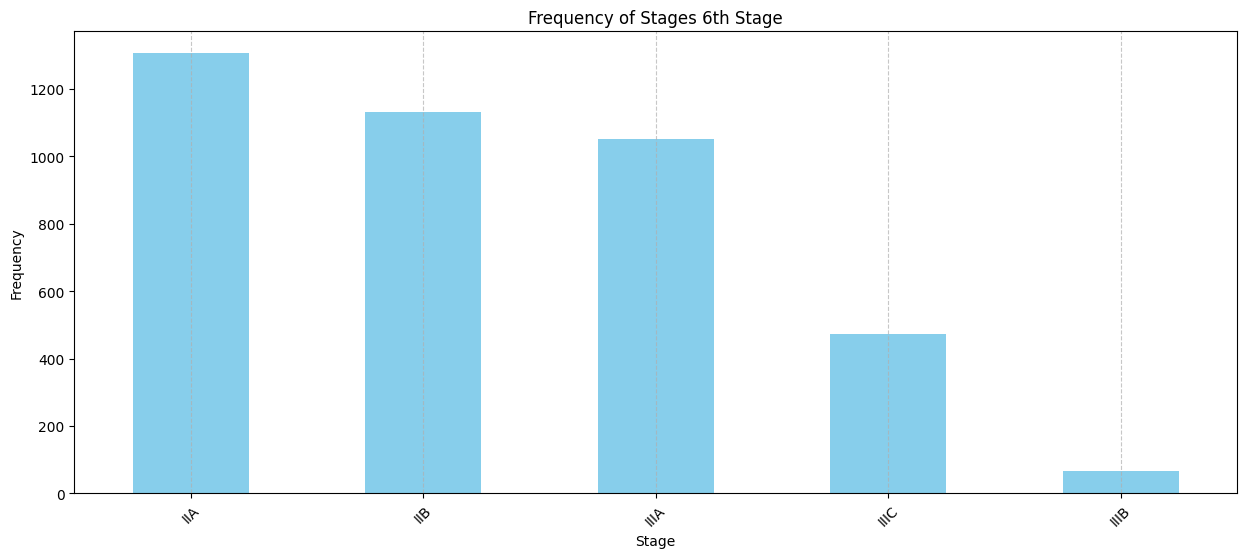

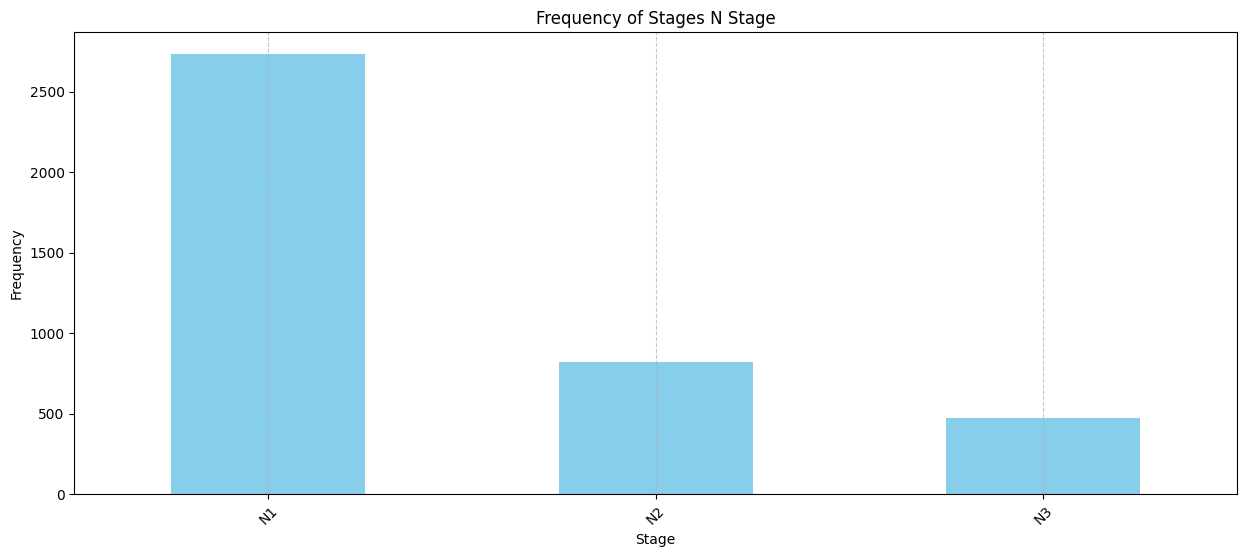

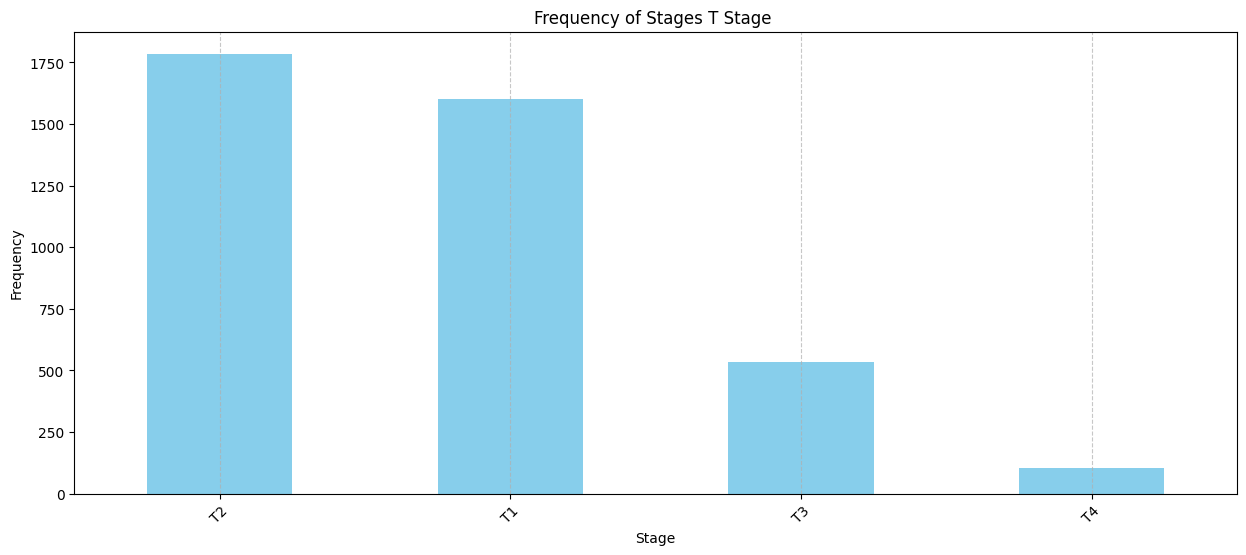

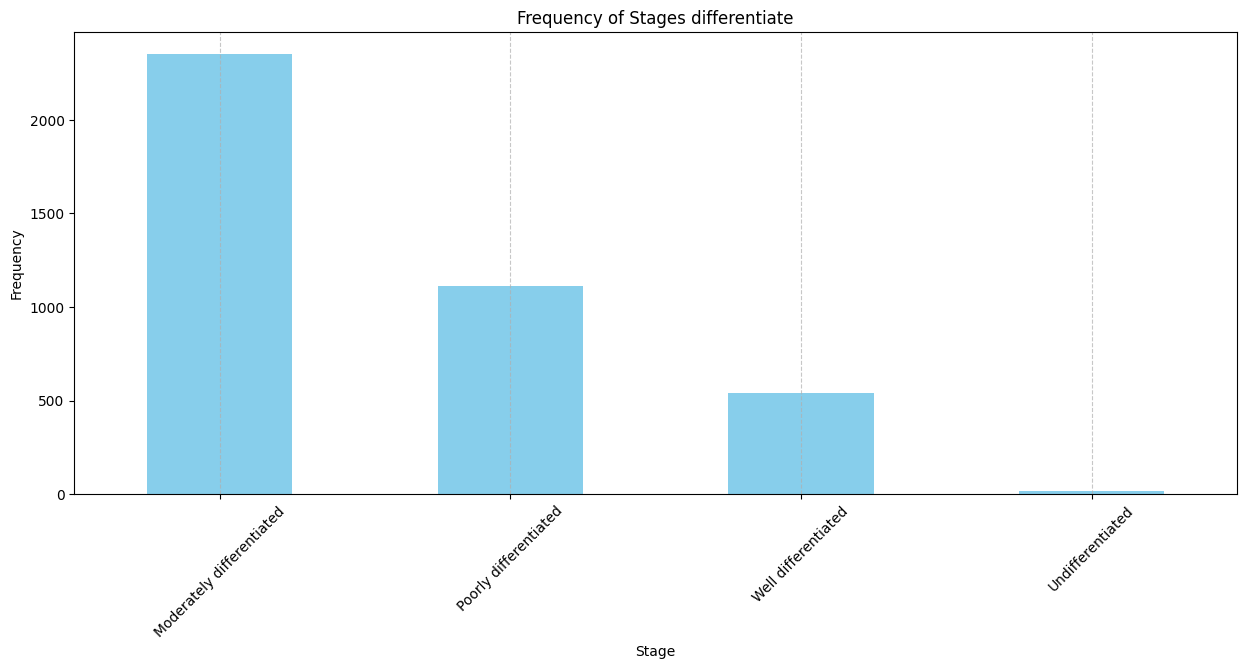

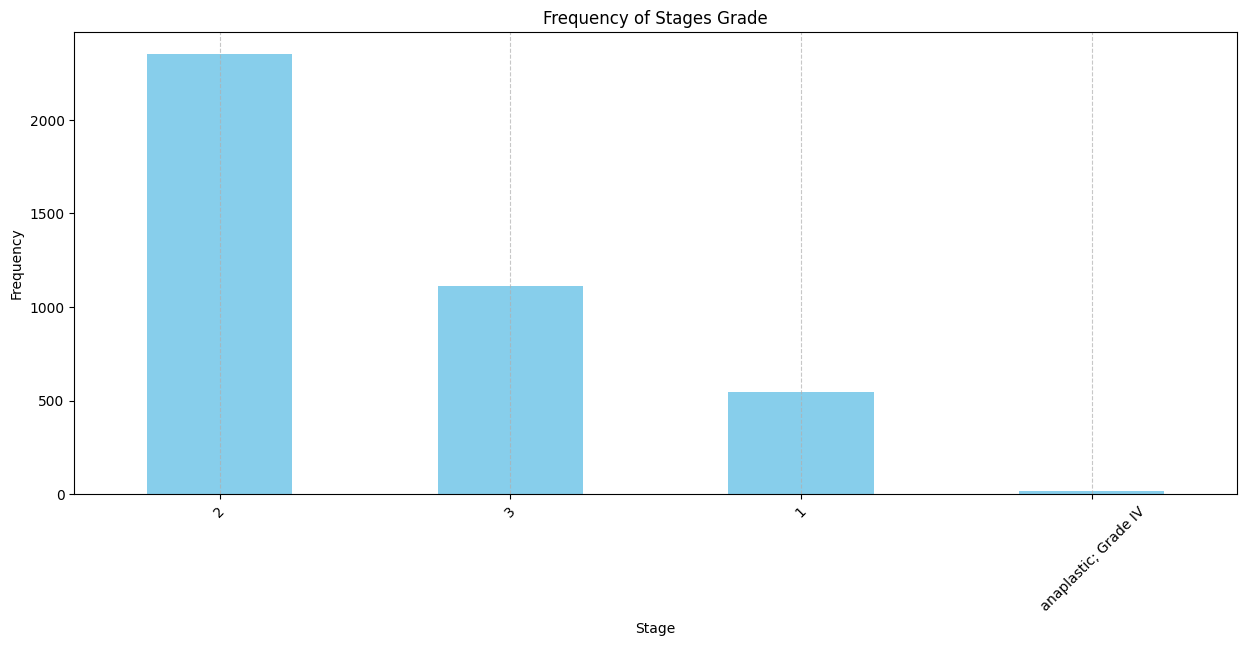

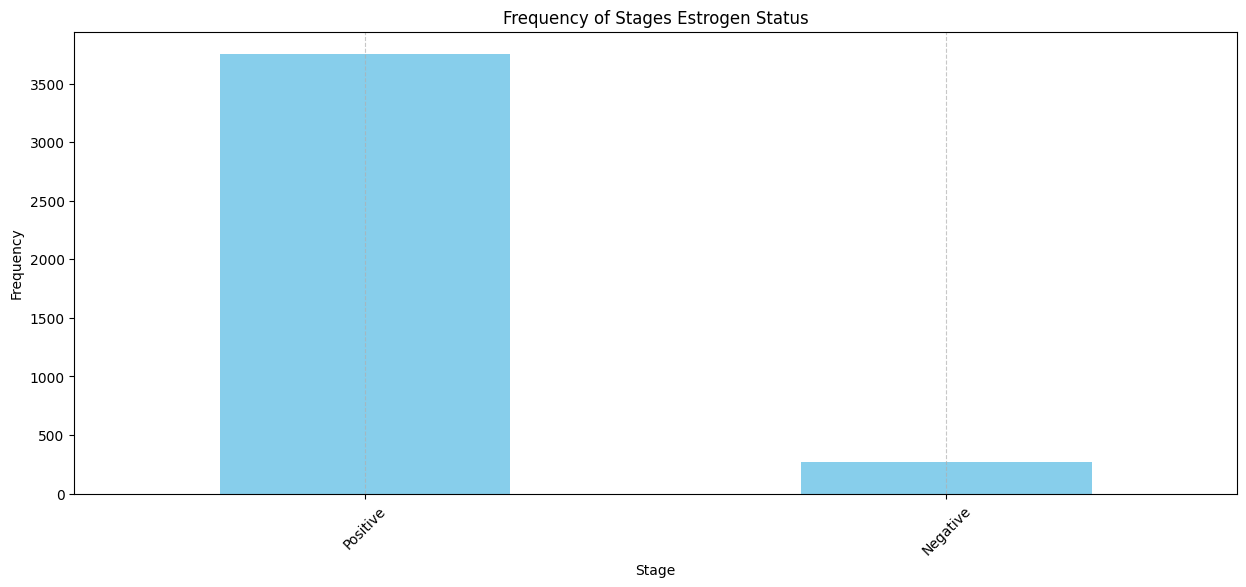

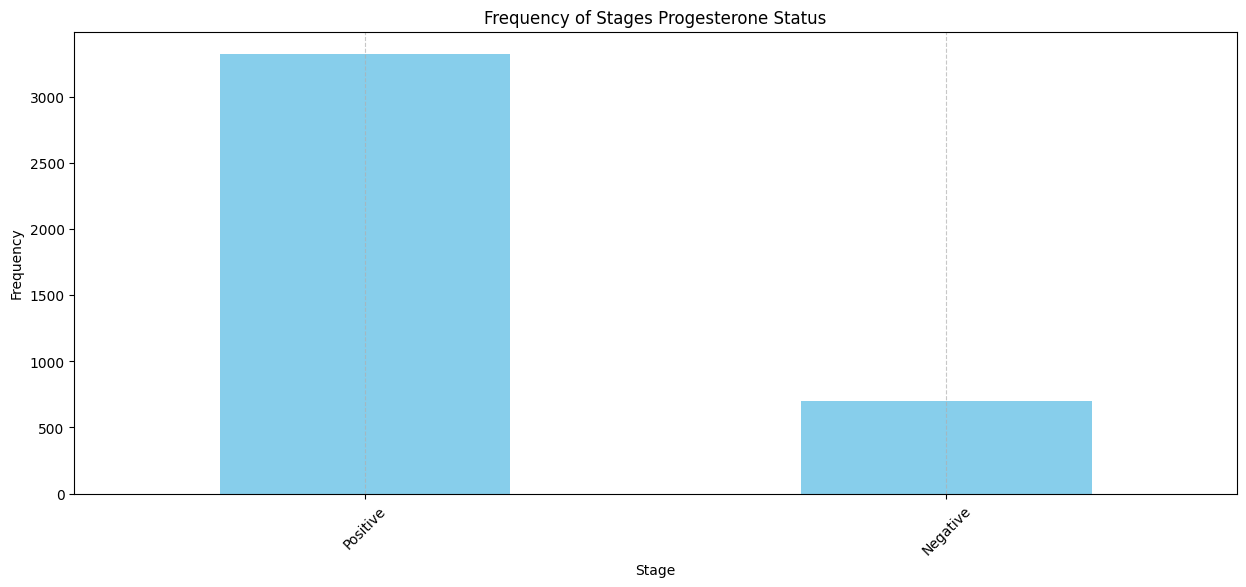

In [ ]:
L=['A Stage','6th Stage','N Stage','T Stage ','differentiate','Grade','Estrogen Status','Progesterone Status']
for col in L:
  plot_stage_frequencies(df1, col)

visualiser le pourcentage de personnes en vie et de personnes décédées pour chaque catégorie de stade dans le DataFrame

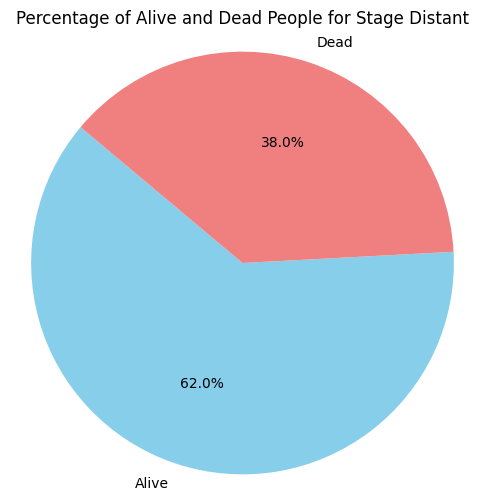

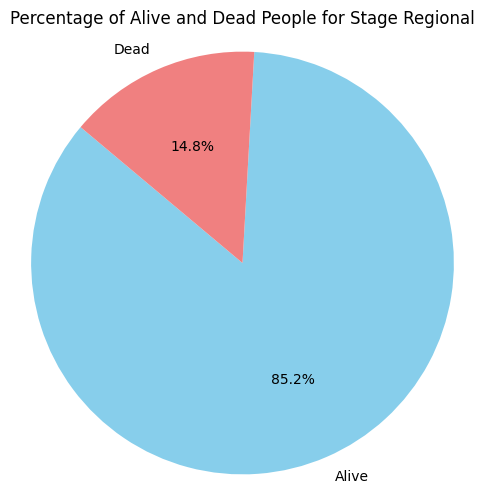

In [ ]:
##now we plot the percentage of each columns values the pourcentage of alive people and dead people


def plot_stage_status_percentage(df, stage_column, status_column):
    # Calculate the percentage of alive and dead people for each stage category
    original_stage_names = label_encoder.classes_
    stage_status_percentage = df.groupby(stage_column)[status_column].value_counts(normalize=True) * 100


    # Plot the pie charts for each stage category
    for stage_category, percentages in stage_status_percentage.groupby(level=0):


        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=percentages.index.get_level_values(1), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
        plt.title(f'Percentage of Alive and Dead People for Stage {stage_category}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

# Call the function with the DataFrame, stage column name, and status column name
plot_stage_status_percentage(df1, 'A Stage', 'Status')


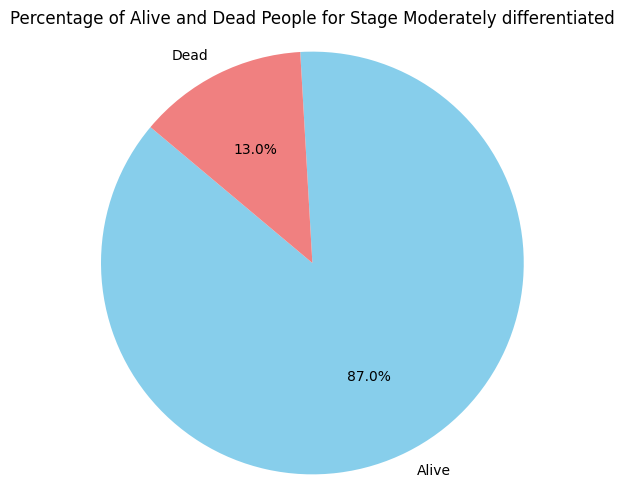

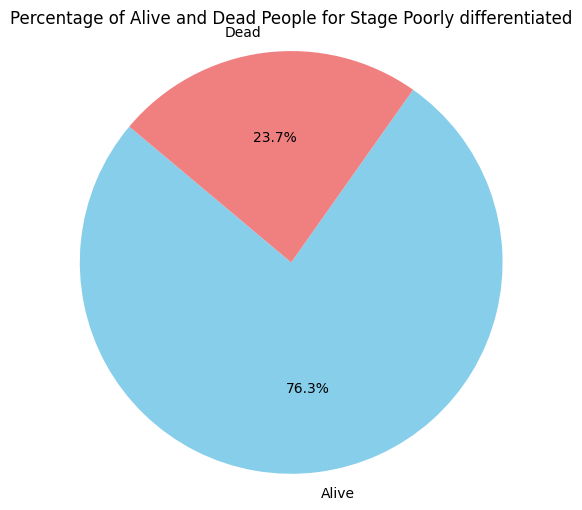

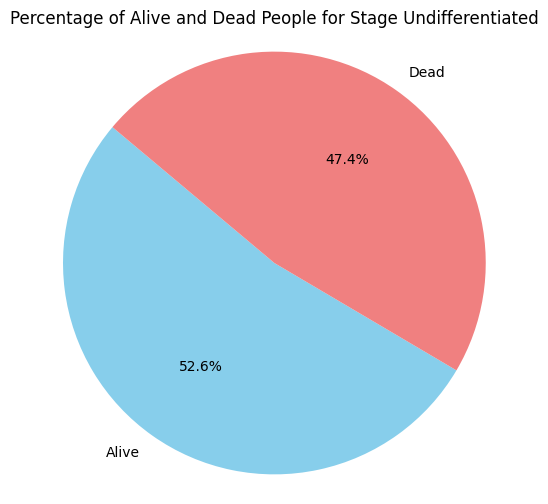

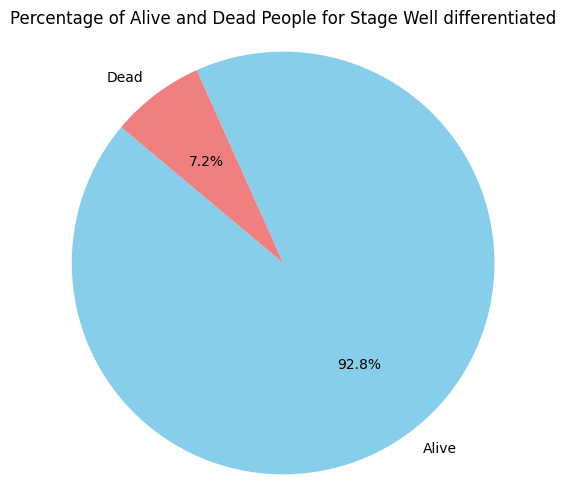

In [ ]:
plot_stage_status_percentage(df1, 'differentiate', 'Status')

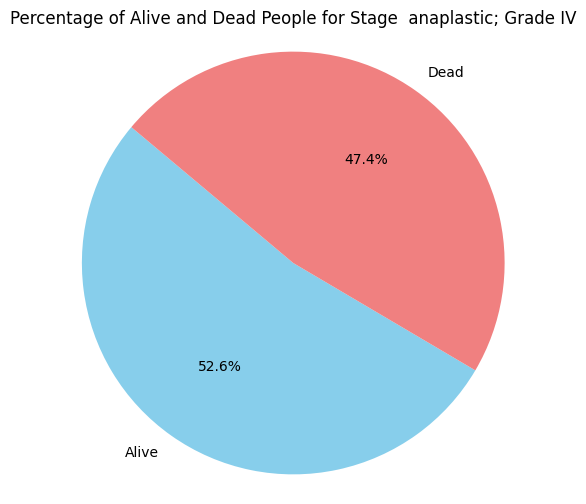

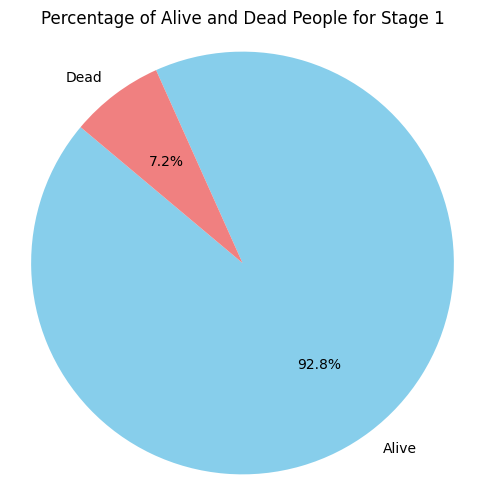

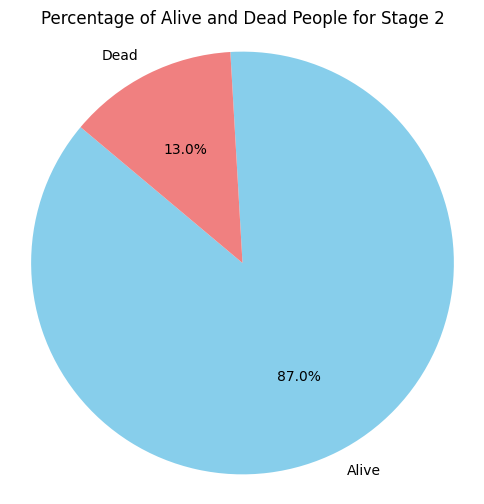

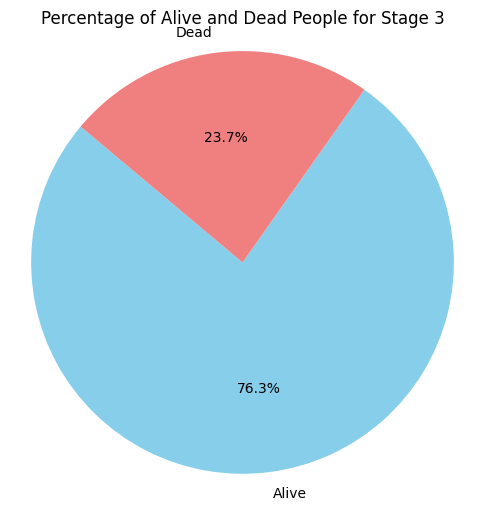

In [ ]:
plot_stage_status_percentage(df1, 'Grade', 'Status')

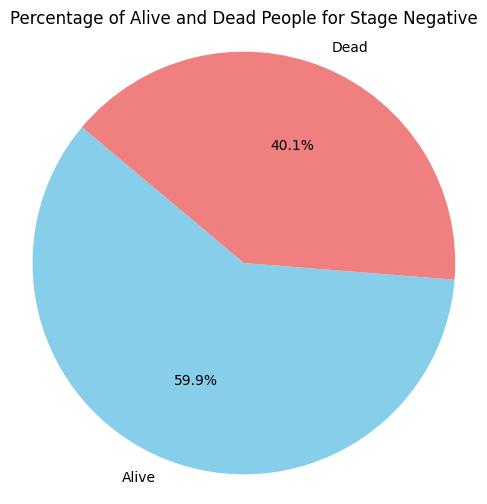

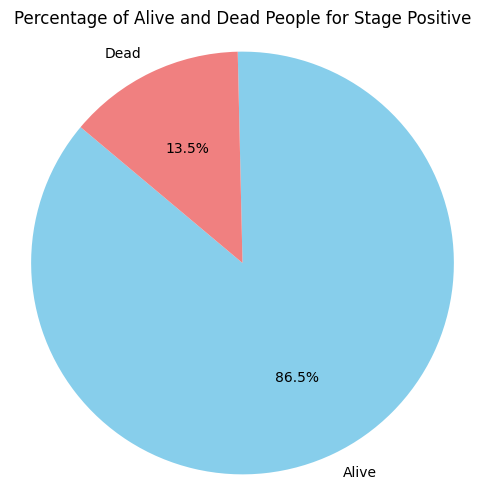

In [ ]:
plot_stage_status_percentage(df1, 'Estrogen Status', 'Status')

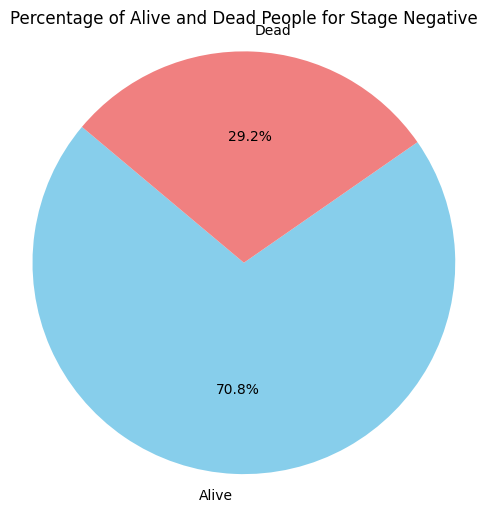

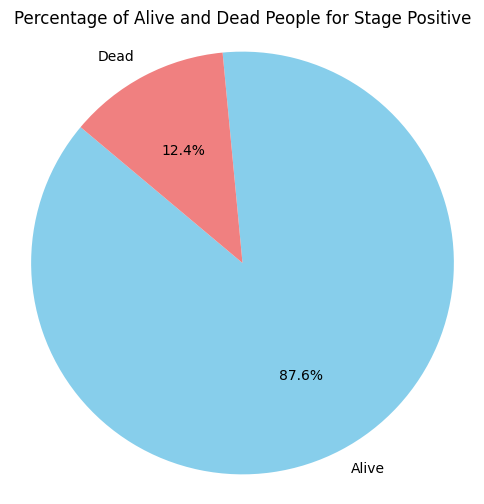

In [ ]:
plot_stage_status_percentage(df1, 'Progesterone Status', 'Status')

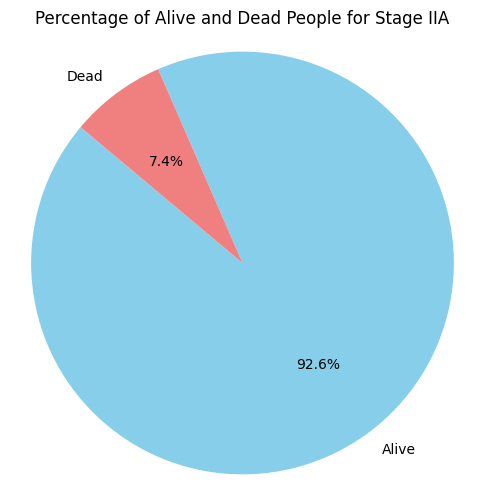

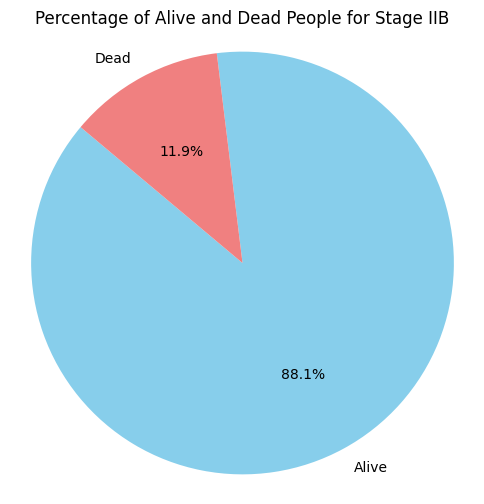

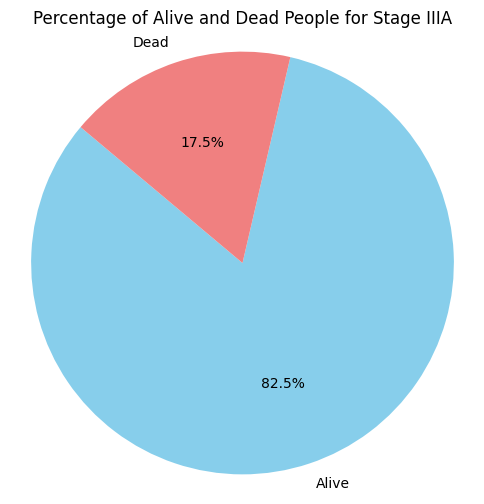

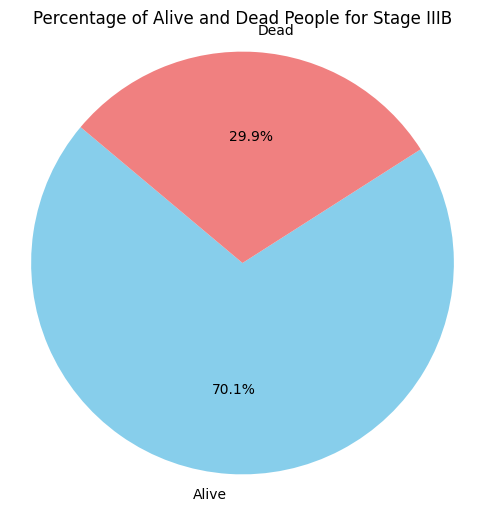

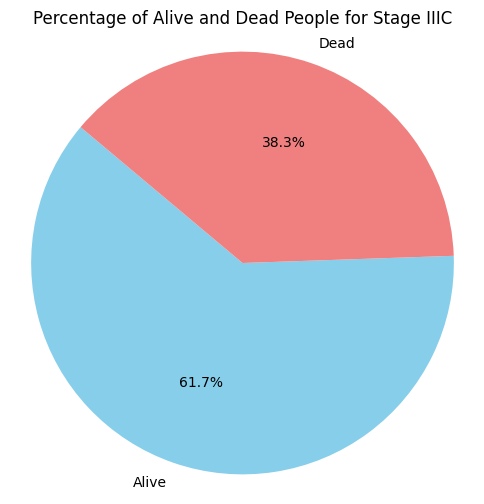

In [ ]:
plot_stage_status_percentage(df1,'6th Stage' , 'Status')

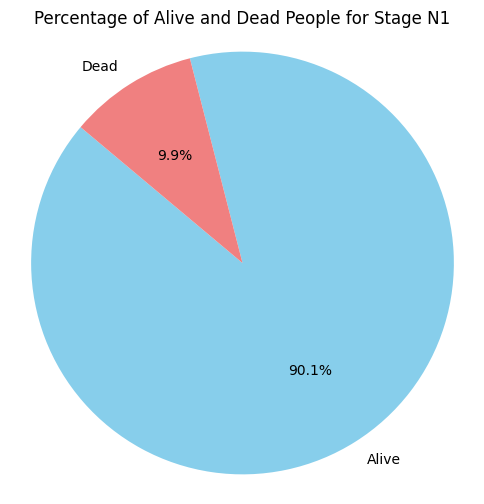

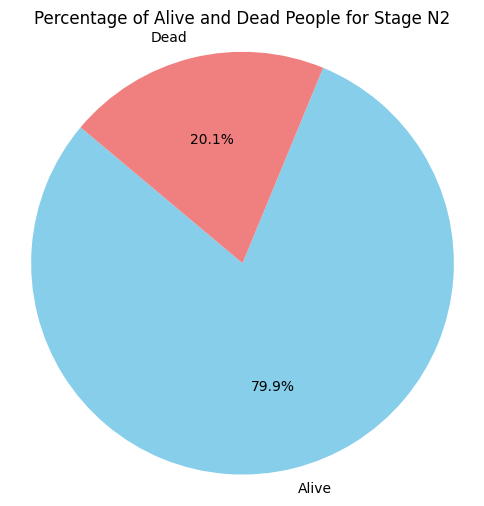

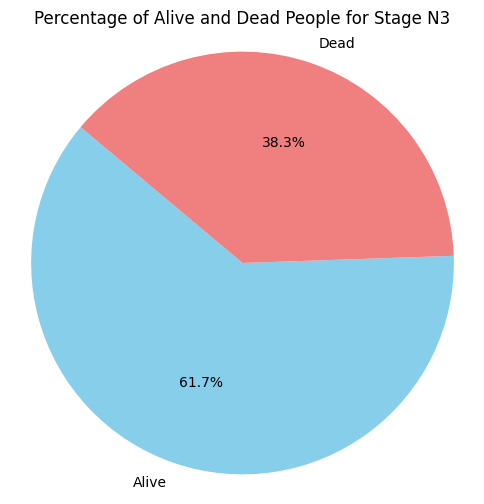

In [ ]:
plot_stage_status_percentage(df1,'N Stage' , 'Status')

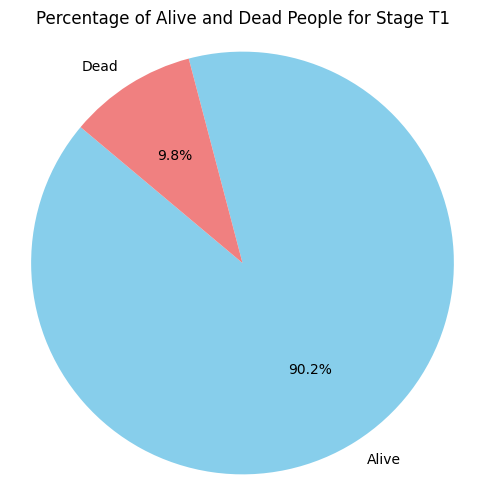

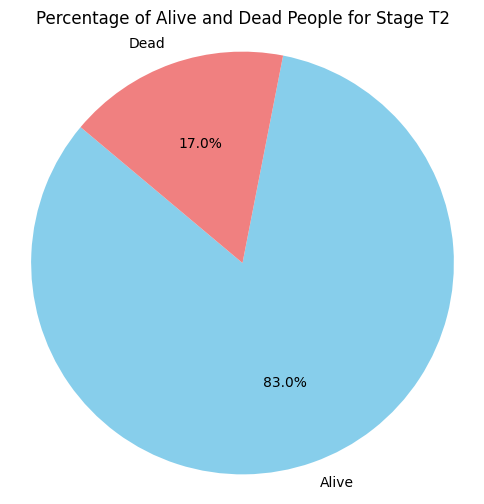

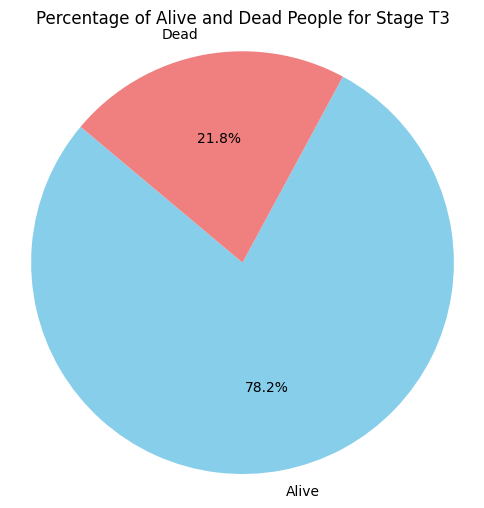

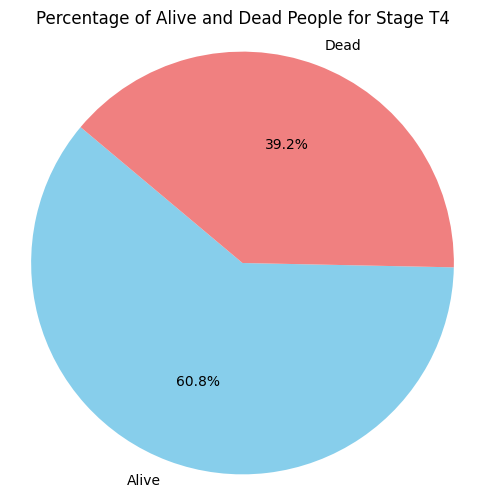

In [ ]:
plot_stage_status_percentage(df1,'T Stage ' , 'Status')

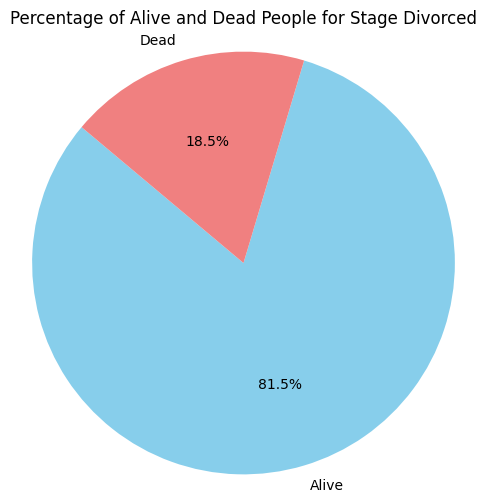

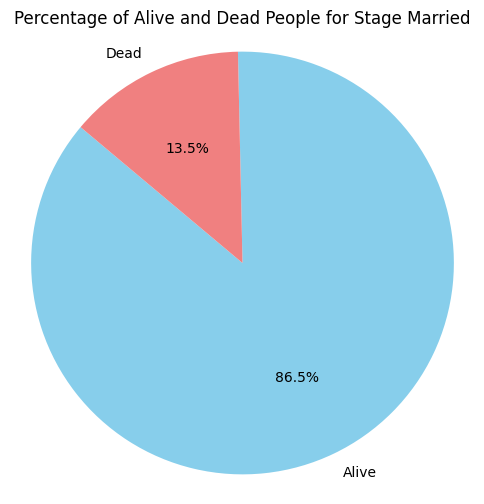

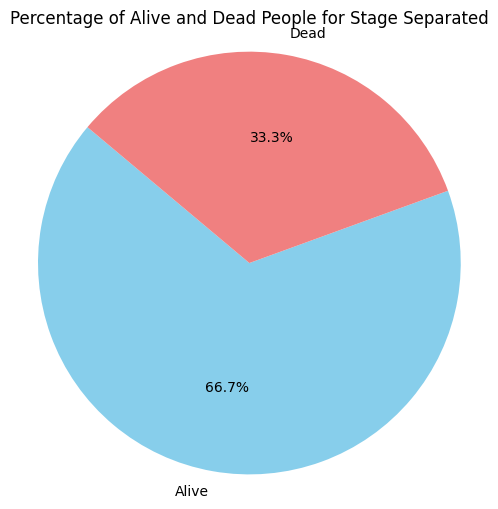

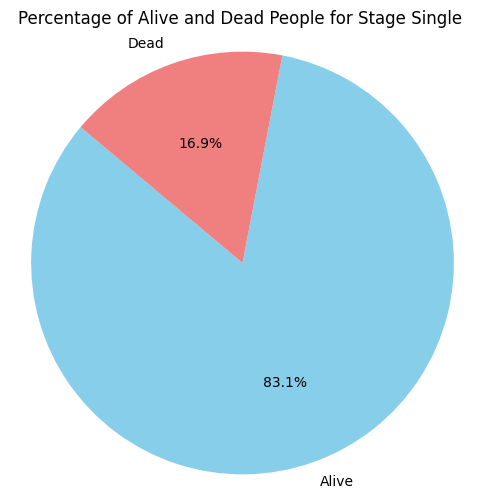

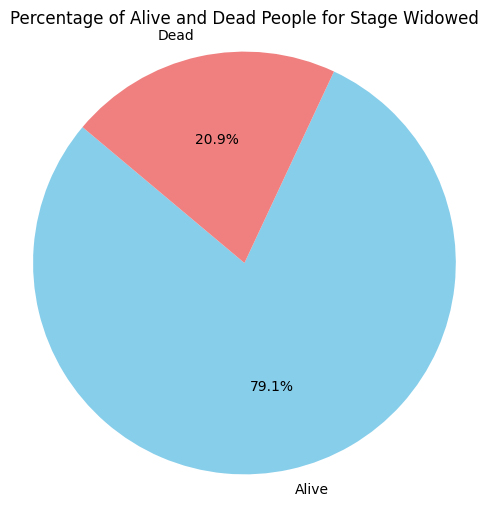

In [ ]:
plot_stage_status_percentage(df1,'Marital Status' , 'Status')

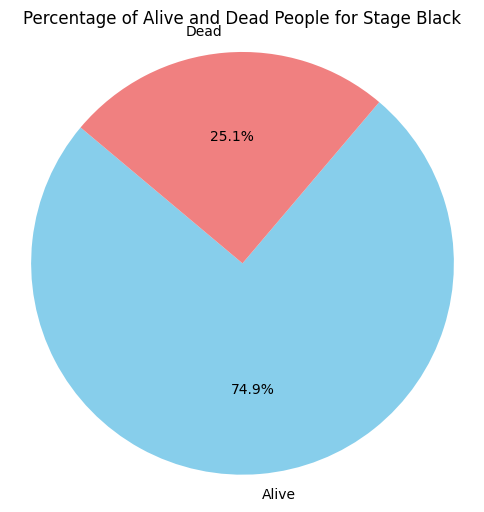

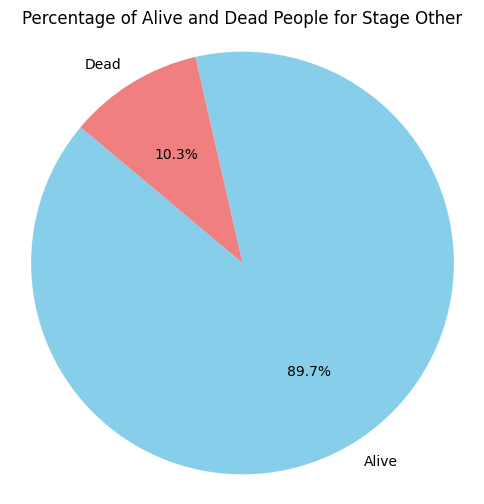

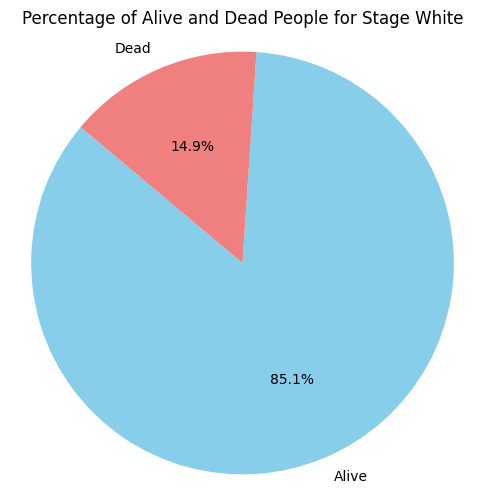

In [ ]:
plot_stage_status_percentage(df1,'Race' , 'Status')

In [ ]:
df.corr()

Age      Race  Marital Status  T Stage   \
Age                     1.000000  0.079734        0.050832 -0.066914   
Race                    0.079734  1.000000       -0.111417  0.001082   
Marital Status          0.050832 -0.111417        1.000000  0.009318   
T Stage                -0.066914  0.001082        0.009318  1.000000   
N Stage                 0.002883 -0.032125        0.013168  0.277015   
6th Stage              -0.018741 -0.025282        0.002989  0.606711   
differentiate           0.015697 -0.018759        0.031639 -0.031355   
Grade                  -0.093216 -0.057032       -0.004283  0.110220   
A Stage                 0.020860  0.007005        0.004936 -0.221124   
Tumor Size             -0.077215 -0.004082        0.007407  0.809176   
Estrogen Status         0.059787  0.057652       -0.017895 -0.060954   
Progesterone Status    -0.021269  0.034351       -0.013485 -0.057633   
Regional Node Examined -0.033345 -0.004778       -0.004285  0.114102   
Reginol Node Positive   0.012586 -0.014604        0.005849  0.243075   
Survival Months        -0.009390  0.040571       -0.025593 -0.085718   
Status                  0.055921 -0.050040        0.033289  0.154699   

                         N Stage  6th Stage  differentiate     Grade  \
Age                     0.002883  -0.018741       0.015697 -0.093216   
Race                   -0.032125  -0.025282      -0.018759 -0.057032   
Marital Status          0.013168   0.002989       0.031639 -0.004283   
T Stage                 0.277015   0.606711      -0.031355  0.110220   
N Stage                 1.000000   0.881880      -0.036249  0.148791   
6th Stage               0.881880   1.000000      -0.042286  0.169986   
differentiate          -0.036249  -0.042286       1.000000 -0.365422   
Grade                   0.148791   0.169986      -0.365422  1.000000   
A Stage                -0.260573  -0.291962      -0.008977 -0.043701   
Tumor Size              0.277905   0.513971      -0.028391  0.099539   
Estrogen Status        -0.101995  -0.105614      -0.021826 -0.186770   
Progesterone Status    -0.093723  -0.101246       0.008957 -0.175816   
Regional Node Examined  0.328276   0.317219      -0.057248  0.083446   
Reginol Node Positive   0.838073   0.773963      -0.028339  0.122931   
Survival Months        -0.139577  -0.144837      -0.004500 -0.058408   
Status                  0.255772   0.257636      -0.018513  0.134170   

                         A Stage  Tumor Size  Estrogen Status  \
Age                     0.020860   -0.077215         0.059787   
Race                    0.007005   -0.004082         0.057652   
Marital Status          0.004936    0.007407        -0.017895   
T Stage                -0.221124    0.809176        -0.060954   
N Stage                -0.260573    0.277905        -0.101995   
6th Stage              -0.291962    0.513971        -0.105614   
differentiate          -0.008977   -0.028391        -0.021826   
Grade                  -0.043701    0.099539        -0.186770   
A Stage                 1.000000   -0.123883         0.065570   
Tumor Size             -0.123883    1.000000        -0.059585   
Estrogen Status         0.065570   -0.059585         1.000000   
Progesterone Status     0.026530   -0.069879         0.513308   
Regional Node Examined -0.069010    0.104352        -0.044836   
Reginol Node Positive  -0.232849    0.242322        -0.085985   
Survival Months         0.070109   -0.086901         0.128469   
Status                 -0.096584    0.134205        -0.184650   

                        Progesterone Status  Regional Node Examined  \
Age                               -0.021269               -0.033345   
Race                               0.034351               -0.004778   
Marital Status                    -0.013485               -0.004285   
T Stage                           -0.057633                0.114102   
N Stage                           -0.093723                0.328276   
6th Stage                         -0.101246    

##Etude ACP (Reduction de dimensions)

*   On a d’après la matrice de corrélation plusieurs variables qui ne se sont pas supérieur à 0.5. Donc, on
peut dire que la factorisation n’est pas conseillée selon la matrice de corrélation.
*   Maintenant on verras le test de KMO et barllet :



In [ ]:

# Calculate Bartlett's test of sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Bartlett's test of sphericity:")
print("Chi-Square Value:", chi_square_value)
print("P-value:", p_value)

# Calculate the Kaiser-Meyer-Olkin (KMO) measure of sampling adequacy
kmo_all, kmo_model = calculate_kmo(df)
print("\nKMO measure of sampling adequacy:")
print("Overall KMO:", kmo_model)


Bartlett's test of sphericity:
Chi-Square Value: 25097.22228465416
P-value: 0.0

KMO measure of sampling adequacy:
Overall KMO: 0.669423053409218


##On a l’indice de KMO >0.5 ainsi la Signification de BartleƩ p_value =0.000, c’est très significatif. Donc la factorisation est conseillée. L’ACP satisfait à au moins deux de ces trois conditions (KMO et BartleƩ), Donc on peut continuer.

##Combien de facteurs retenir ? :
Trois règles sont applicables :
• 1ere règle : la règle de Kaiser qui veut qu’on ne retienne que les facteurs aux valeurs propres supérieures à 1.
• 2eme règle : on choisit le nombre d’axe en fonction de la restitution minimale d’information que l’on souhaite. Pour ces deux premières règles, on examine le tableau « Variance totale expliquée ».
 	D’après la 1ere règle de Kaiser et d’après le tableau Variance totale expliquée et dans la colonne ‘cumulés’, on voit qu’on restitue 74,664% si on retient 5 facteurs
*	• 3eme règle : test du coude. On observe le graphique des valeurs propres et on ne retient que les valeurs qui se trouvent à gauche du point d’inflexion. Graphiquement, on part des composants qui apportent le moins d’information (qui se trouvent à droite), on relie par une droite les points presque alignés et on ne retient que les axes qui sont au-dessus de cette ligne.
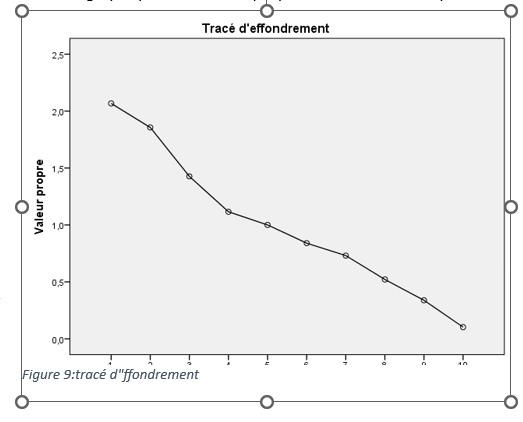



comprendre la contribution de chaque composante principale à l'explication de la variance dans les données et pour décider du nombre de composantes principales à retenir lors de l'analyse en composantes principales.

In [ ]:

# Fit PCA
pca = PCA()
pca.fit(df.T)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio and cumulative explained variance ratio
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)


Explained Variance Ratio:
[2.18912481e-01 1.04613264e-01 9.83647346e-02 9.34385582e-02
 8.09816875e-02 7.68786449e-02 6.69690179e-02 5.86479328e-02
 5.32144573e-02 4.97037016e-02 3.58324411e-02 3.28961546e-02
 1.49922314e-02 1.15484718e-02 3.00622195e-03 2.38680863e-32]

Cumulative Explained Variance Ratio:
[0.21891248 0.32352574 0.42189048 0.51532904 0.59631072 0.67318937
 0.74015839 0.79880632 0.85202078 0.90172448 0.93755692 0.97045307
 0.98544531 0.99699378 1.         1.        ]


Le graphique montre le ratio de la variance expliquée par chaque composante principale. On utilise le critère du coude pour choisir le nombre de composantes à conserver : on cherche le point où la courbe commence à s'aplatir et ce point indique le nombre adéquat de composantes principales qui représentent la majorité de la variabilité des données sans inclure le bruit ou les composantes moins significatives.

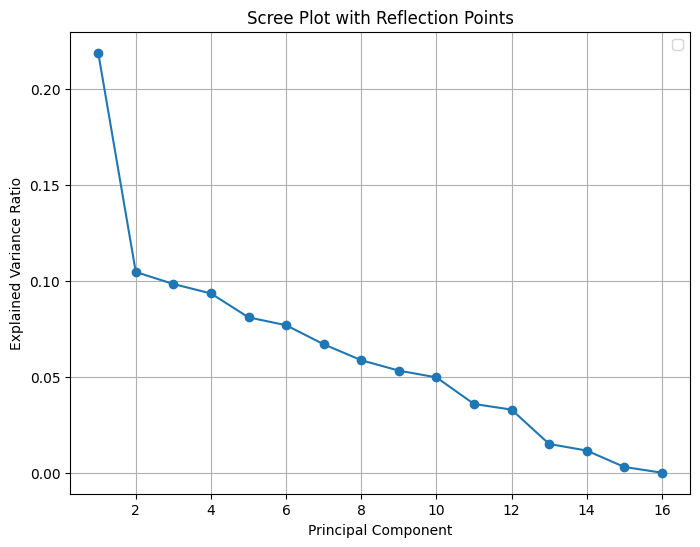

In [ ]:
# Compute the second derivative of the explained variance ratio
second_derivative = np.gradient(np.gradient(explained_variance_ratio))

# Find the indices where the second derivative is closest to zero
reflection_point_indices = np.where(np.abs(second_derivative) < 1e-5)[0]

# Plot scree plot with reflection points
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot with Reflection Points')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Plot reflection points
for index in reflection_point_indices:
    plt.plot(index + 1, explained_variance_ratio[index], marker='o', markersize=10, color='red', label='Reflection Points')

plt.legend()
plt.show()


In [ ]:
second_derivative = np.gradient(np.gradient(explained_variance_ratio))

# Calculer la dérivée seconde à partir du quatrième point
fourth_point_second_derivative = second_derivative[3]

print("La dérivée seconde à partir du quatrième point est:", fourth_point_second_derivative)

La dérivée seconde à partir du quatrième point est: -0.0013463019478211075


Cette valeur négative indique un changement concave dans la courbe à ce point, une dérivée seconde négative pourrait signifier que on est après le "coude", càd que les composantes principales avant ce point sont celles qui contribuent le plus à la variance des données, tandis que les composantes suivantes contribuent de moins en moins et pourraient être omises pour simplifier le modèle sans perdre une quantité significative d'information.

## Conclution : On doit retenir 3 composantes

Réduire la dimensionnalité des données à l'aide de l'analyse en composantes principales (ACP) avec 3 composantes principales.

In [ ]:
# Créer une instance de PCA avec le nombre de composantes souhaité
pca = PCA(n_components=3)

# Fitter le modèle PCA et transformer les données
PCA_3= pca.fit_transform(df)

# Afficher la forme de la nouvelle représentation des données
print("La forme de la représentation transformée des données est :", PCA_3.shape)



La forme de la représentation transformée des données est : (4024, 3)


Créer une DataFrame à partir de la matrice de composantes de l'objet PCA. Cette matrice contient les composantes principales extraites pendant le processus de l'ACP. Chaque ligne de la matrice correspond à une composante principale, et chaque colonne correspond à l'un des attributs d'origine des données.

In [ ]:
components_matrix = pca.components_
print("Matrice de composantes :")
pd.DataFrame(components_matrix)

Matrice de composantes :


0         1         2         3         4         5         6   \
0 -0.024451 -0.026762  0.009980  0.331720  0.434214  0.480043 -0.047740   
1 -0.008168 -0.129614  0.059464 -0.159494 -0.104308 -0.146973 -0.101817   
2  0.236270  0.004315  0.037783 -0.535085  0.301884  0.042784  0.122515   

         7         8         9         10        11        12        13  \
0  0.143050 -0.191342  0.312176 -0.122967 -0.114029  0.212402  0.414439   
1  0.289452  0.057826 -0.148494 -0.529932 -0.521504 -0.116200 -0.110995   
2 -0.152789 -0.016385 -0.544388  0.066118  0.070636  0.268465  0.352223   

         14        15  
0 -0.145304  0.215977  
1 -0.319350  0.348616  
2 -0.100764  0.113225

Réaliser une Analyse en Composantes Principales (ACP) la data et pour visualiser les données transformées dans un graphique en nuage de points 3D, avec chaque point coloré en fonction de sa valeur 'Status'(dead, live). C'est utile pour comprendre la dispersion et le regroupement des données dans l'espace à dimensions réduites créé par l'ACP.

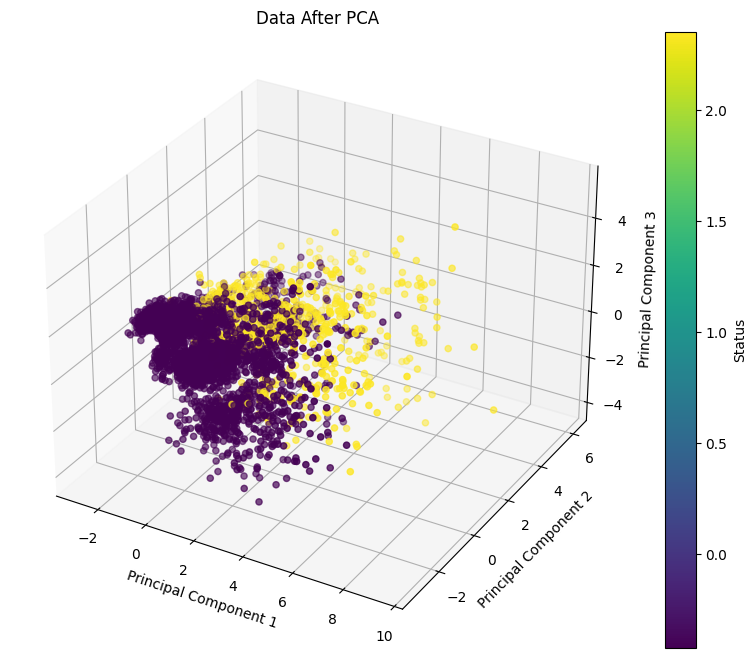

[0.23401527 0.10621713 0.08927124]


In [ ]:
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=3)

# Fit the PCA model and transform the data
transformed_data = pca.fit_transform(df)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the transformed data with multicolors based on 'Status'
sc = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=df["Status"], cmap='viridis', marker='o')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data After PCA')

# Show the color bar legend
cbar = plt.colorbar(sc)
cbar.set_label('Status')

# Show the plot
plt.show()

# Display explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
print(explained_variance_ratios)


Les valeurs obtenus sont les ratios de variance expliquée pour chacune des trois premières composantes principales obtenues par l'ACP :

La première composante principale explique environ 23.40% de la variance.
La deuxième composante principale explique environ 10.62% de la variance.
La troisième composante principale explique environ 8.93% de la variance.
Ces trois composantes combinées expliquent donc un peu plus de 42% de la variance totale des données. Cela peut être considéré comme une quantité assez significative pour seulement trois dimensions

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


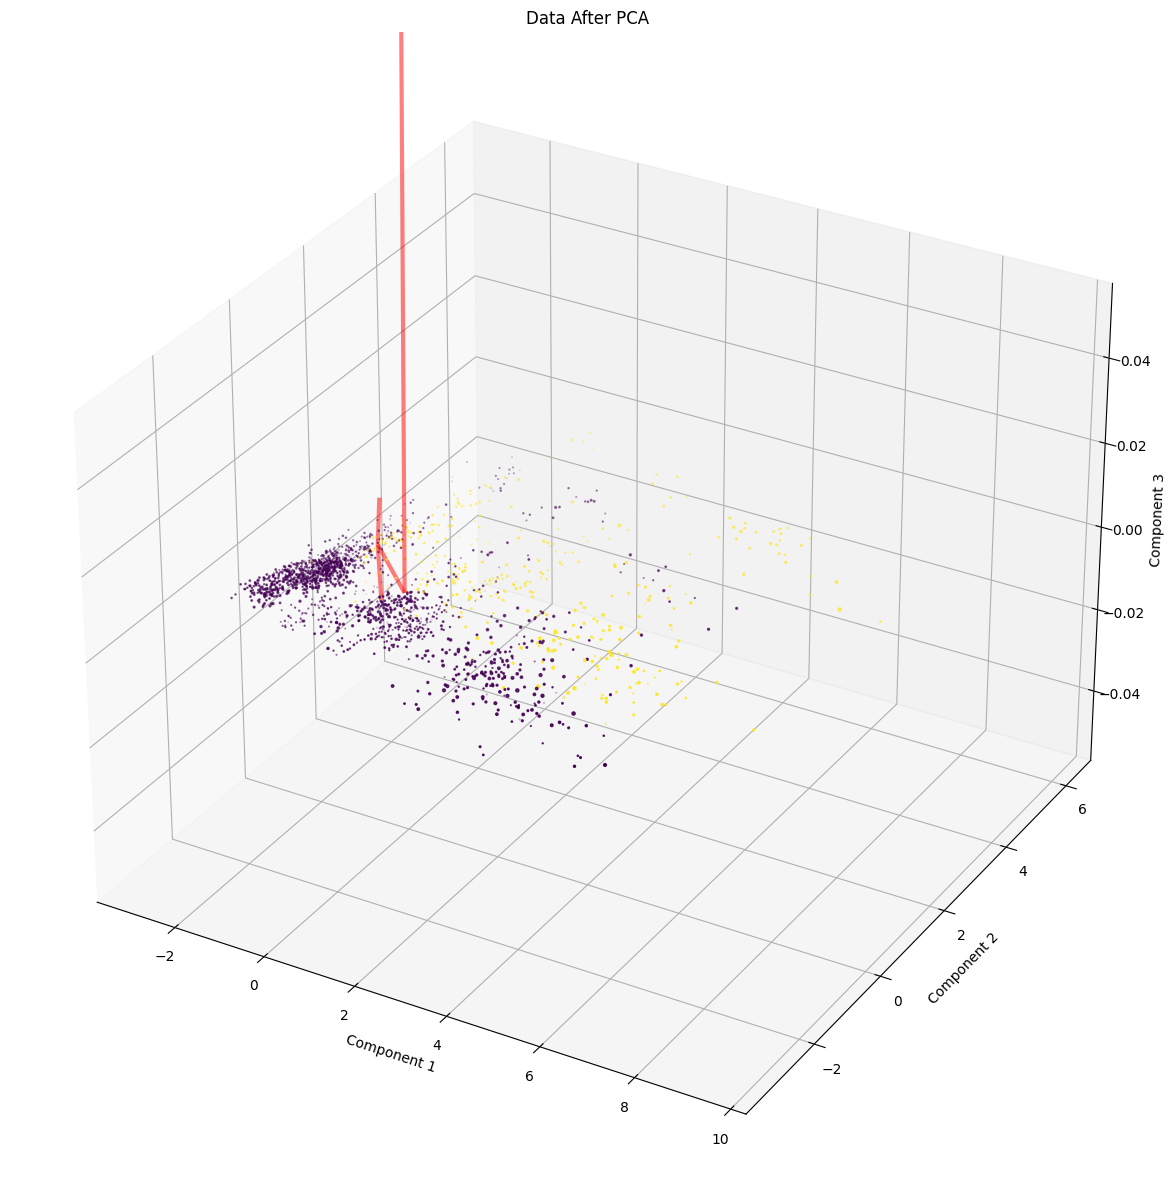

array([0.23401527, 0.10621713, 0.08927197, 0.08433453, 0.07354225])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Assuming 'data' is your dataset

# Create an instance of PCA with 5 components
pca = PCA(n_components=5)

# Fit the PCA model and transform the data
transformed_data = pca.fit_transform(df)

# Access the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot the transformed data
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the transformed data with multicolors
plt.scatter(transformed_data[:, 0], transformed_data[:, 1],transformed_data[:, 2],df["Status"] ,cmap='viridis', marker='o')

# Set labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Data After PCA')

# Plot arrows for additional components
 # Plot only additional components
ax.quiver(0, 0, 0,pca.components_[3, 0] * 3, pca.components_[3, 1] * 3,
          pca.components_[3, 2] * 3,  # Direction of arrow, scaled by 3
          color='r', alpha=0.5, linewidth=3, arrow_length_ratio=0.1)
ax.quiver(0, 0, 0,pca.components_[4, 0] * 3, pca.components_[4, 1] * 3,
          pca.components_[4, 2] * 3,  # Direction of arrow, scaled by 3
          color='r', alpha=0.5, linewidth=3, arrow_length_ratio=0.1)

# Show the plot
plt.show()
explained_variance_ratios


In [ ]:
pd.DataFrame(transformed_data).count()

0    4024
1    4024
2    4024
3    4024
4    4024
dtype: int64

# Data Modeling

##Supervised learning

###**Linear regression:**

#####**RLM**

In [ ]:
# Perform PCA with 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

# Convert the PCA-transformed data into a DataFrame (if it's not already)
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, 6)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_df,df["Survival Months"], test_size=0.2, random_state=42)

# Add a constant term to the features for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit linear regression model using statsmodels
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print summary of regression results
print(results.summary())

# Make predictions on the testing data
y_pred = results.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:        Survival Months   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1408.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:29:14   Log-Likelihood:                -2692.7
No. Observations:                3219   AIC:                             5397.
Df Residuals:                    3213   BIC:                             5434.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.010     -0.157      0.8

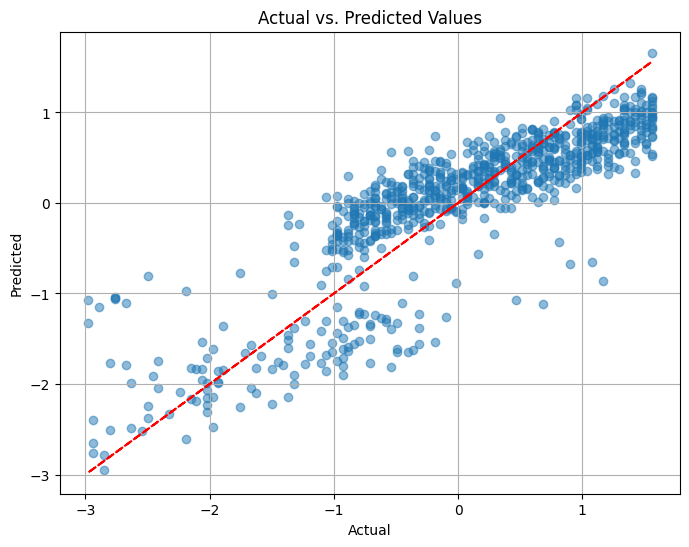

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Plotting the diagonal line (y_test = y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

In [ ]:
unique_statuses = df["Status"].unique()

# Create a dictionary to map unique values to 0 and 1
status_mapping = {status: idx for idx, status in enumerate(unique_statuses)}

# Map the "Status" column using the created dictionary
df["Status_encoded"] = df["Status"].map(status_mapping)

# Display the unique encoded values
print("Encoded values:", df["Status_encoded"].unique())


Encoded values: [0 1]


###classification

####**KNN**

Accuracy: 0.9875776397515528


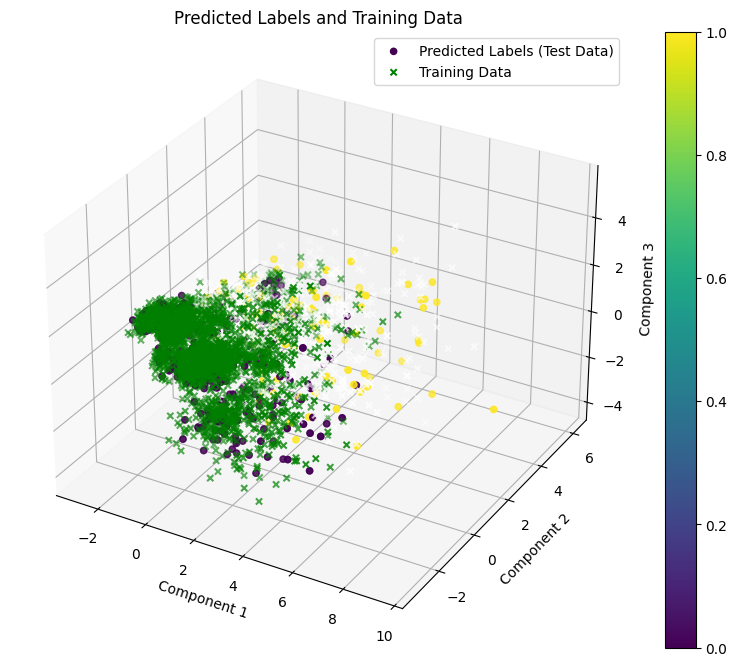

In [ ]:
# Assuming 'df' is your DataFrame containing the data
X = df.drop(columns=["Status_encoded"])  # Features
y = df["Status_encoded"]  # Target

# Perform PCA
pca = PCA(n_components=5)  # Use 5 principal components
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the predicted values and train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot test data
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='viridis', marker='o', label='Predicted Labels (Test Data)')

# Plot train data
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='ocean', marker='x', label='Training Data')

# Set labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Predicted Labels and Training Data')

# Add legend
plt.legend()

# Show plot
plt.colorbar(ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='viridis'))
plt.show()


####**SVM**

In [ ]:
# Assuming 'df' is your DataFrame containing the data
X = df.drop(columns=["Status_encoded"])  # Features
y = df["Status_encoded"]  # Targe
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_data,df["Status_encoded"], test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy: 0.9801242236024845


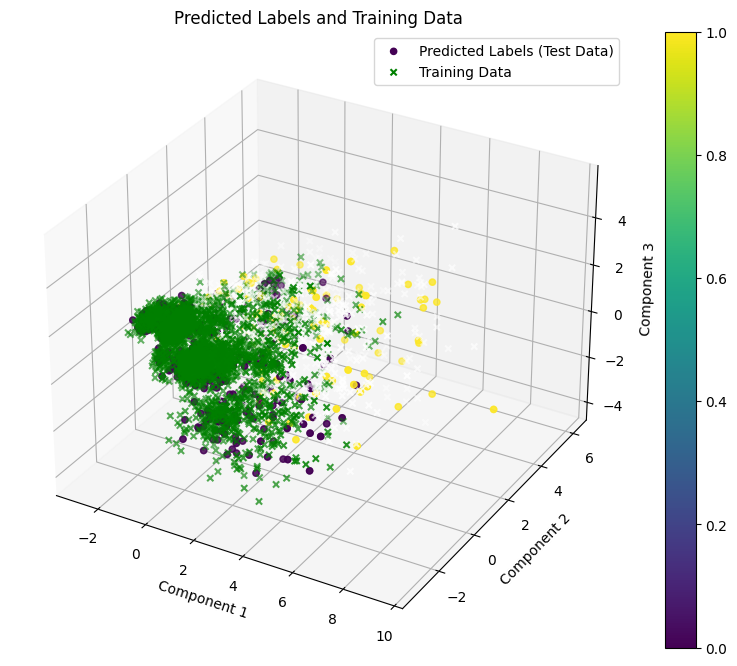

In [ ]:
# Perform PCA
pca = PCA(n_components=5)  # Use 5 principal components
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the predicted values and train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot test data
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='viridis', marker='o', label='Predicted Labels (Test Data)')

# Plot train data
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='ocean', marker='x', label='Training Data')

# Set labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Predicted Labels and Training Data')

# Add legend
plt.legend()

# Show plot
plt.colorbar(ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='viridis'))
plt.show()

####ANN

Epoch 1/20
81/81 [==============================] - 4s 27ms/step - loss: 0.2933 - accuracy: 0.9142 - val_loss: 0.1182 - val_accuracy: 0.9798
Epoch 2/20
81/81 [==============================] - 1s 7ms/step - loss: 0.0825 - accuracy: 0.9740 - val_loss: 0.0694 - val_accuracy: 0.9798
Epoch 3/20
81/81 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9779 - val_loss: 0.0665 - val_accuracy: 0.9783
Epoch 4/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9775 - val_loss: 0.0583 - val_accuracy: 0.9783
Epoch 5/20
81/81 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9775 - val_loss: 0.0575 - val_accuracy: 0.9798
Epoch 6/20
81/81 [==============================] - 2s 27ms/step - loss: 0.0535 - accuracy: 0.9798 - val_loss: 0.0565 - val_accuracy: 0.9798
Epoch 7/20
81/81 [==============================] - 1s 13ms/step - loss: 0.0517 - accuracy: 0.9802 - val_loss: 0.0540 - val_accuracy: 0.9829
Epoch 8/20
81/81 

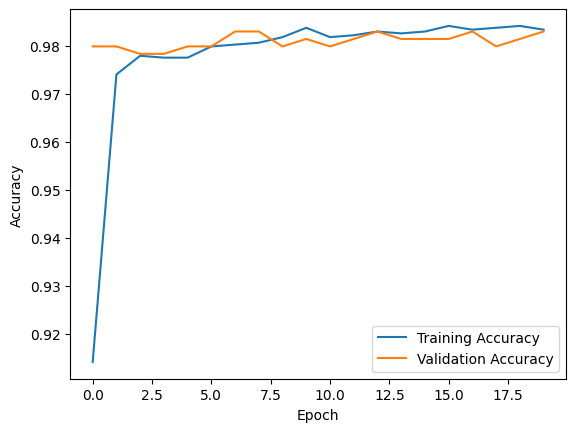

In [ ]:
# Define the neural network architecture
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####Decision Tree

Decision Tree Accuracy: 0.9788819875776398
Random Forest Accuracy: 0.9850931677018634
XGBoost Accuracy: 0.9813664596273292
Gradient Boosting Accuracy: 0.9838509316770186


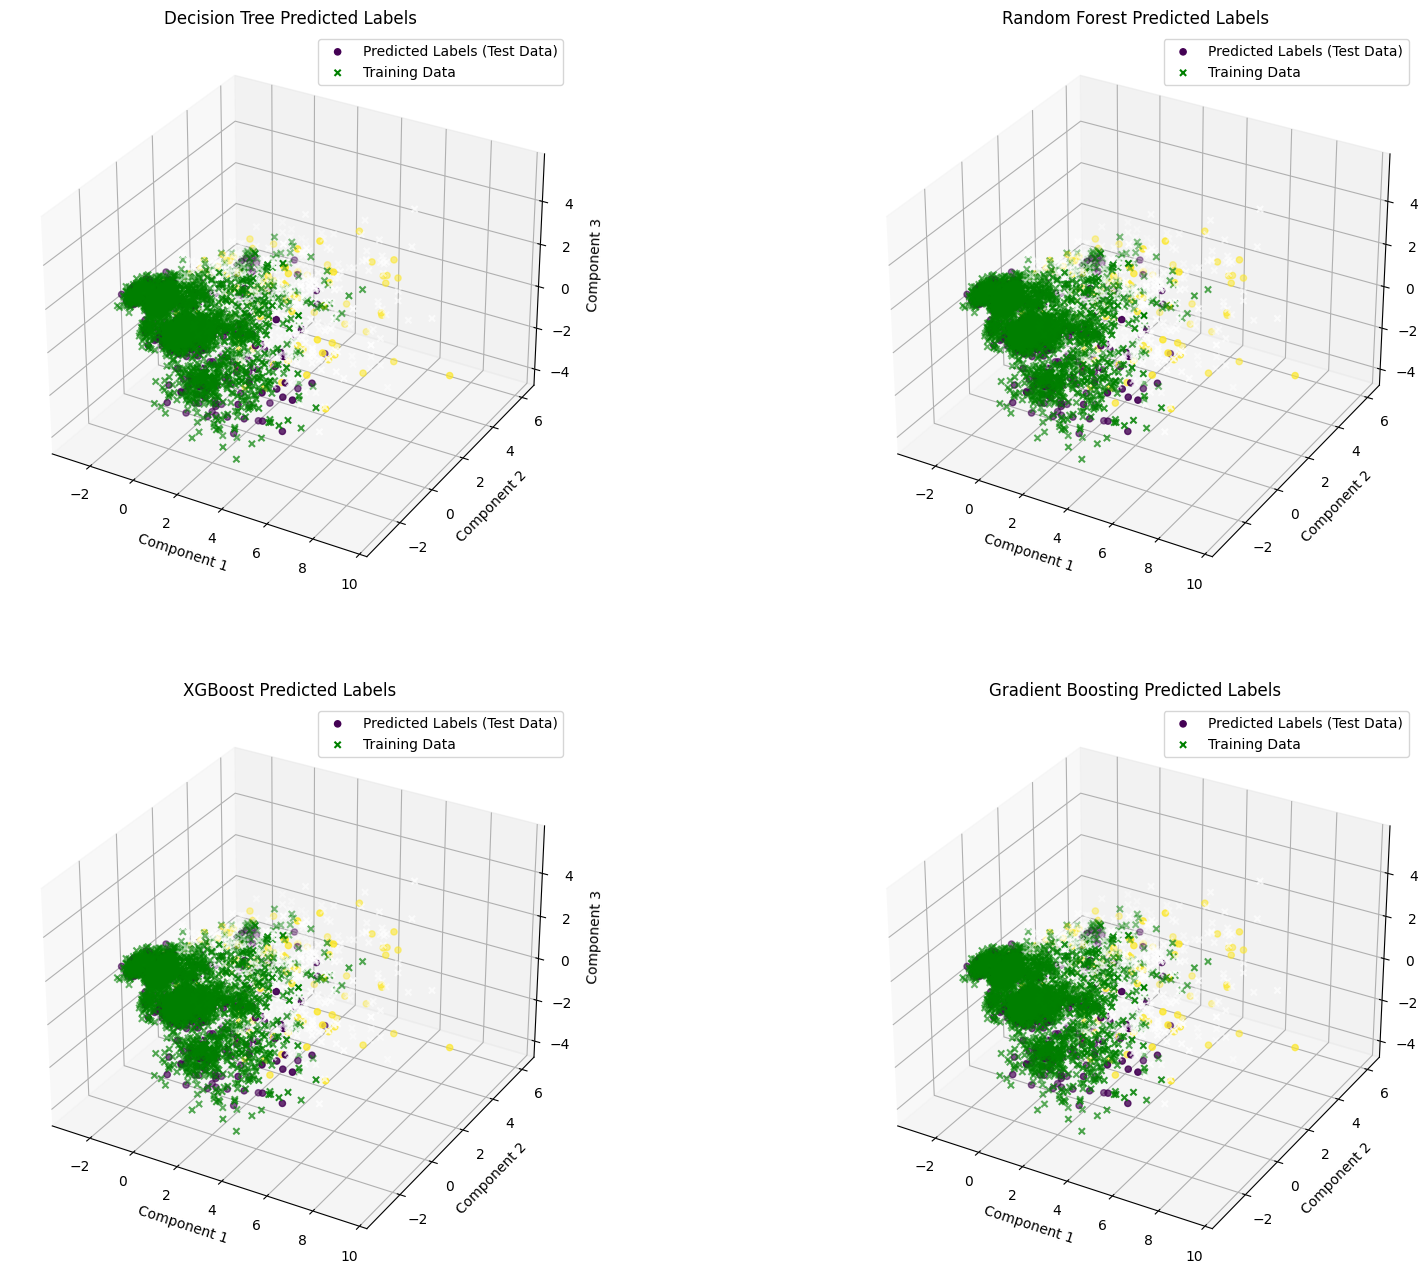

In [ ]:
# Assuming 'df' is your DataFrame containing the data
X = df.drop(columns=["Status_encoded"])  # Features
y = df["Status_encoded"]  # Target

# Perform PCA
pca = PCA(n_components=5)  # Use 5 principal components
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Initialize and train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Plot the predicted values and train data for Decision Tree
fig = plt.figure(figsize=(20, 16))

# Plot test data for Decision Tree
ax_dt = fig.add_subplot(221, projection='3d')
ax_dt.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_dt, cmap='viridis', marker='o', label='Predicted Labels (Test Data)')
ax_dt.set_title('Decision Tree Predicted Labels')

# Plot train data for Decision Tree
ax_dt.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='ocean', marker='x', label='Training Data')
ax_dt.set_xlabel('Component 1')
ax_dt.set_ylabel('Component 2')
ax_dt.set_zlabel('Component 3')
ax_dt.legend()

# Plot the predicted values and train data for Random Forest
ax_rf = fig.add_subplot(222, projection='3d')
ax_rf.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_rf, cmap='viridis', marker='o', label='Predicted Labels (Test Data)')
ax_rf.set_title('Random Forest Predicted Labels')

# Plot train data for Random Forest
ax_rf.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='ocean', marker='x', label='Training Data')
ax_rf.set_xlabel('Component 1')
ax_rf.set_ylabel('Component 2')
ax_rf.set_zlabel('Component 3')
ax_rf.legend()

# Plot the predicted values and train data for XGBoost
ax_xgb = fig.add_subplot(223, projection='3d')
ax_xgb.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_xgb, cmap='viridis', marker='o', label='Predicted Labels (Test Data)')
ax_xgb.set_title('XGBoost Predicted Labels')

# Plot train data for XGBoost
ax_xgb.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='ocean', marker='x', label='Training Data')
ax_xgb.set_xlabel('Component 1')
ax_xgb.set_ylabel('Component 2')
ax_xgb.set_zlabel('Component 3')
ax_xgb.legend()

# Plot the predicted values and train data for Gradient Boosting
ax_gb = fig.add_subplot(224, projection='3d')
ax_gb.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_gb, cmap='viridis', marker='o', label='Predicted Labels (Test Data)')
ax_gb.set_title('Gradient Boosting Predicted Labels')

# Plot train data for Gradient Boosting
ax_gb.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='ocean', marker='x', label='Training Data')
ax_gb.set_xlabel('Component 1')
ax_gb.set_ylabel('Component 2')
ax_gb.set_zlabel('Component 3')
ax_gb.legend()

# Show plots
plt.show()

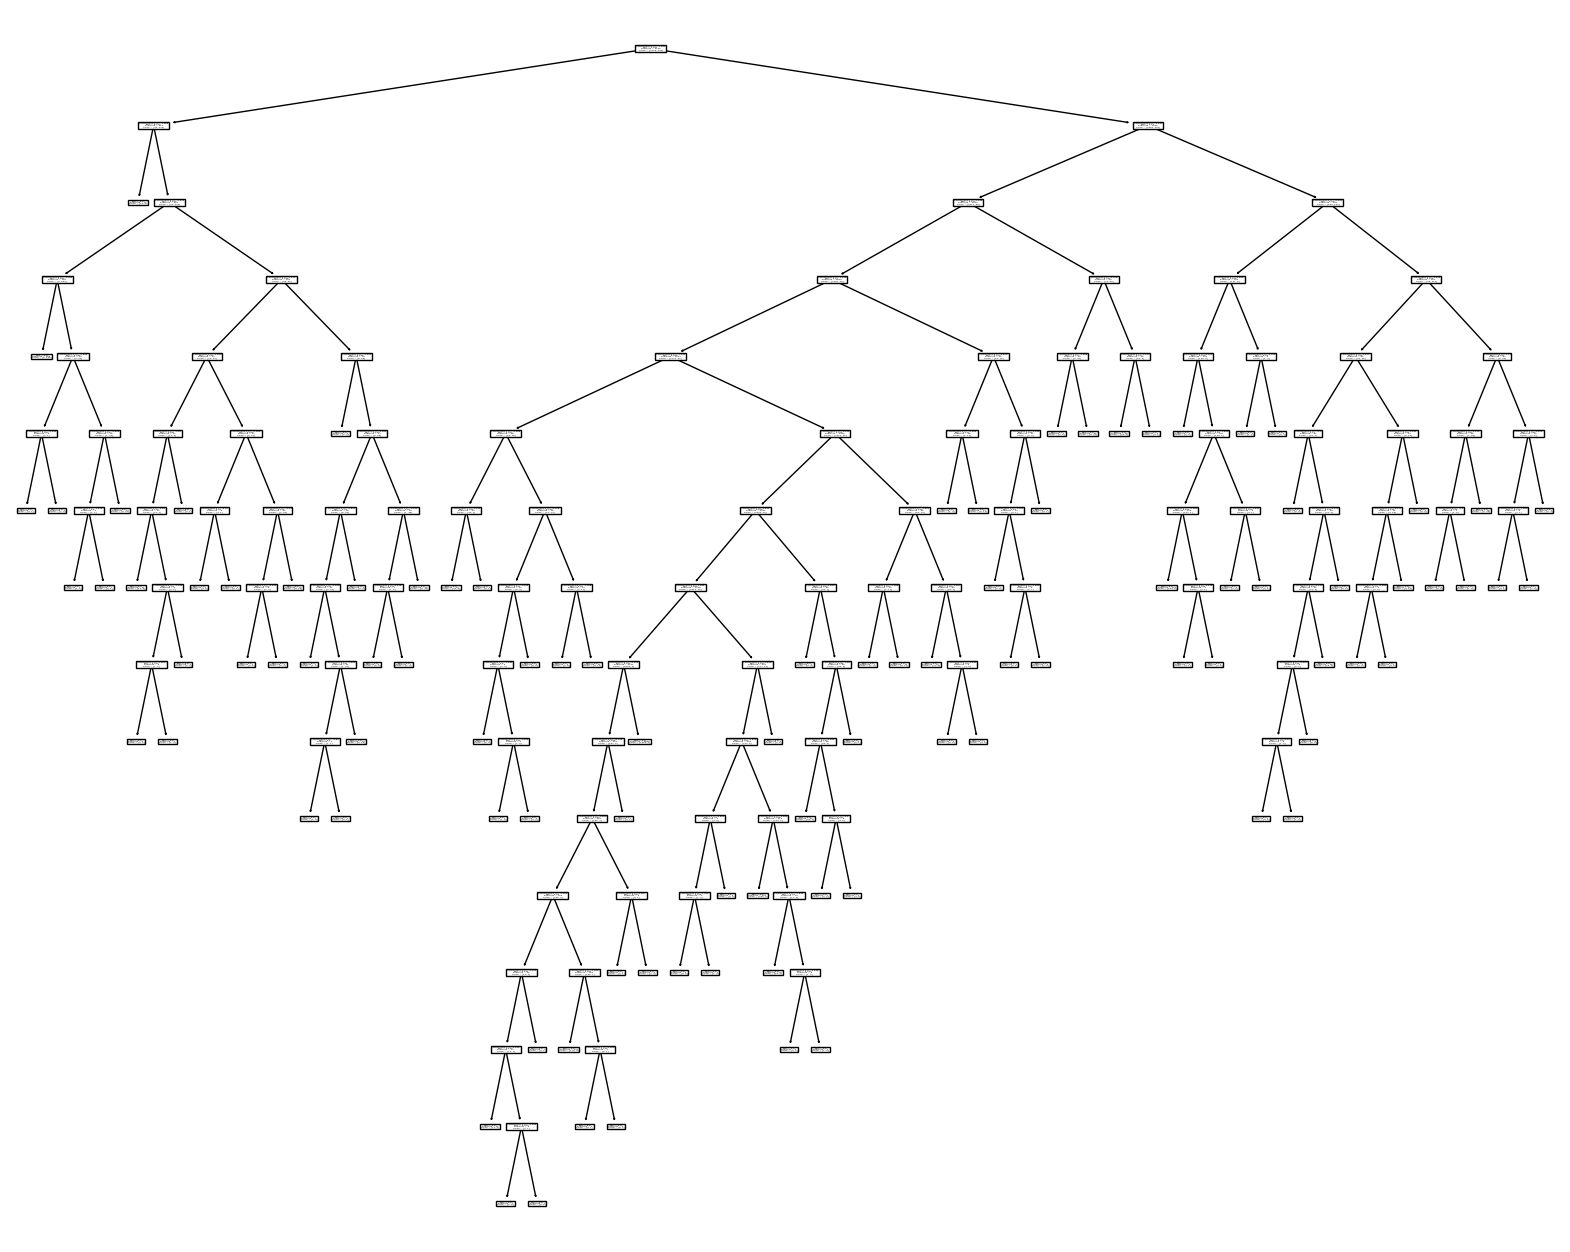

In [ ]:
# Feature names for 5 principal components
feature_names = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 16))

# Plot the decision tree with specified feature names
plot_tree(dt_classifier, filled=False, feature_names=feature_names, ax=ax)

# Save the plot as an image with high DPI
plt.savefig('decision_tree.png', dpi=300)

# Show the plot
plt.show()


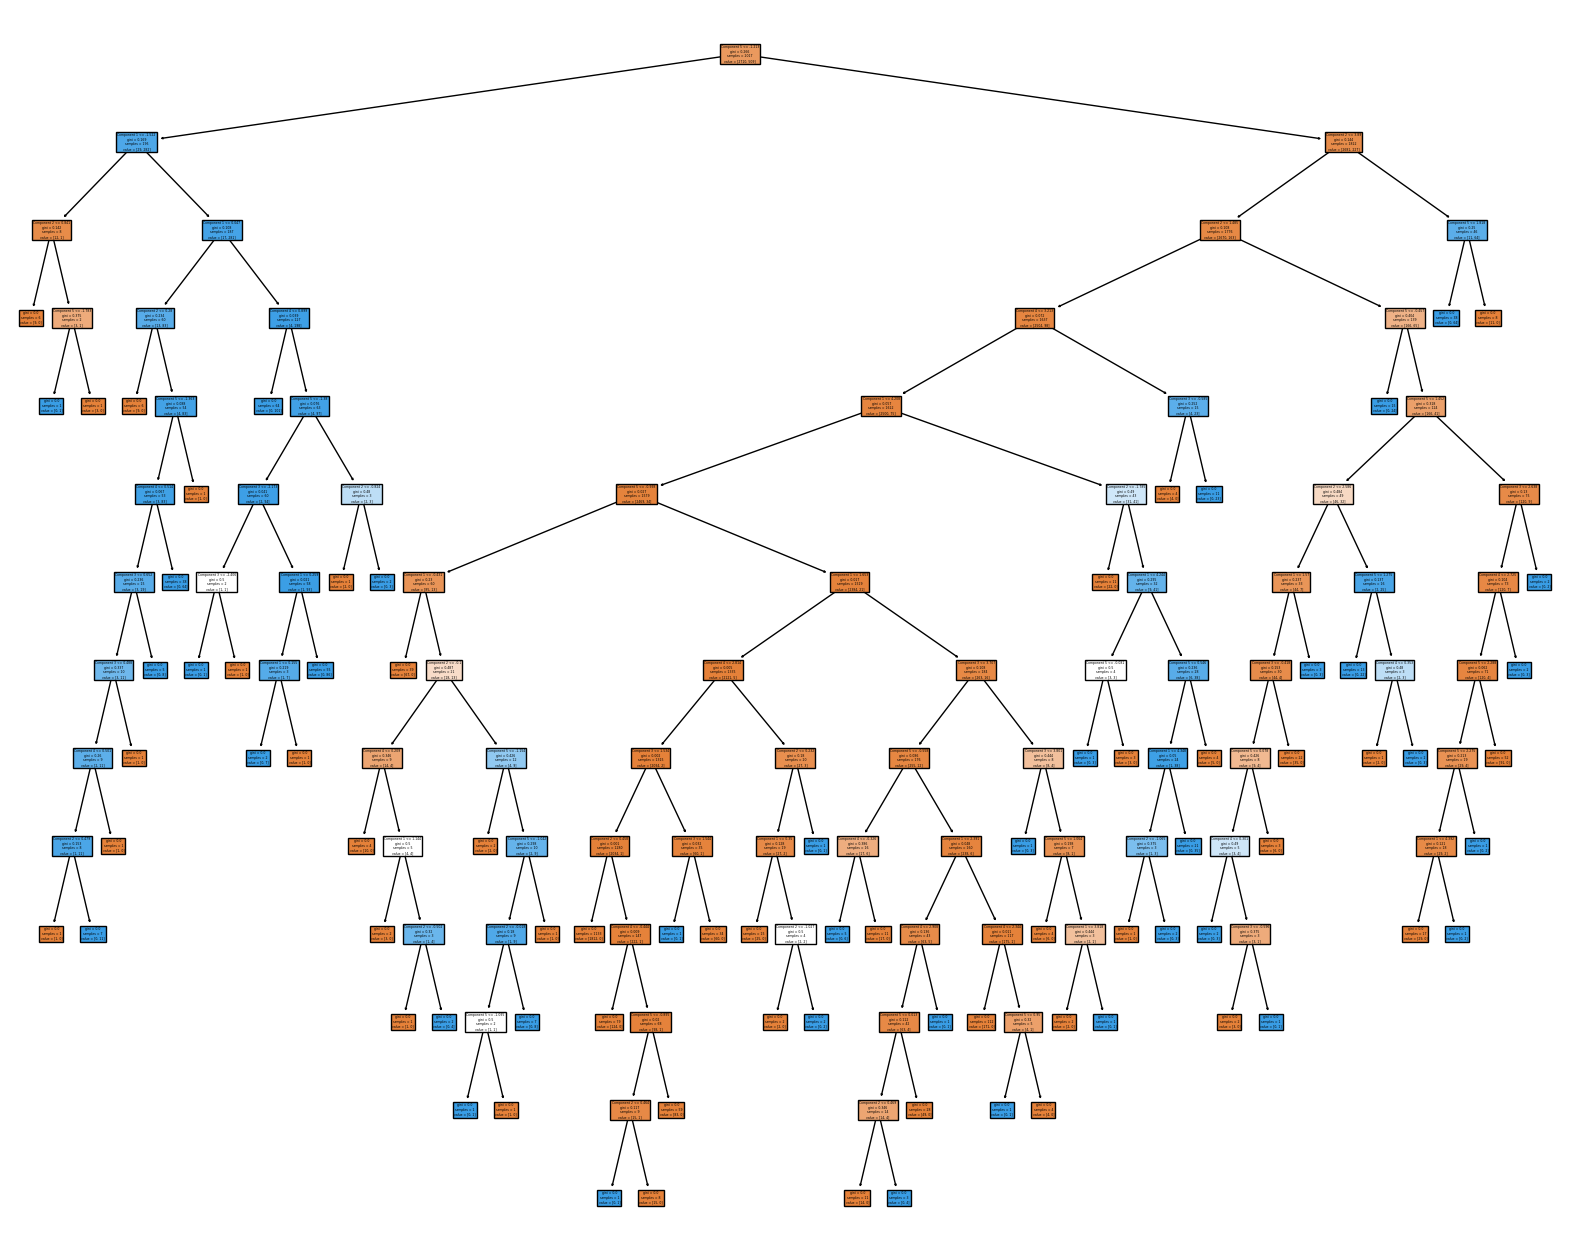

In [ ]:
plt.figure(figsize=(20, 16))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=feature_names)
plt.show()

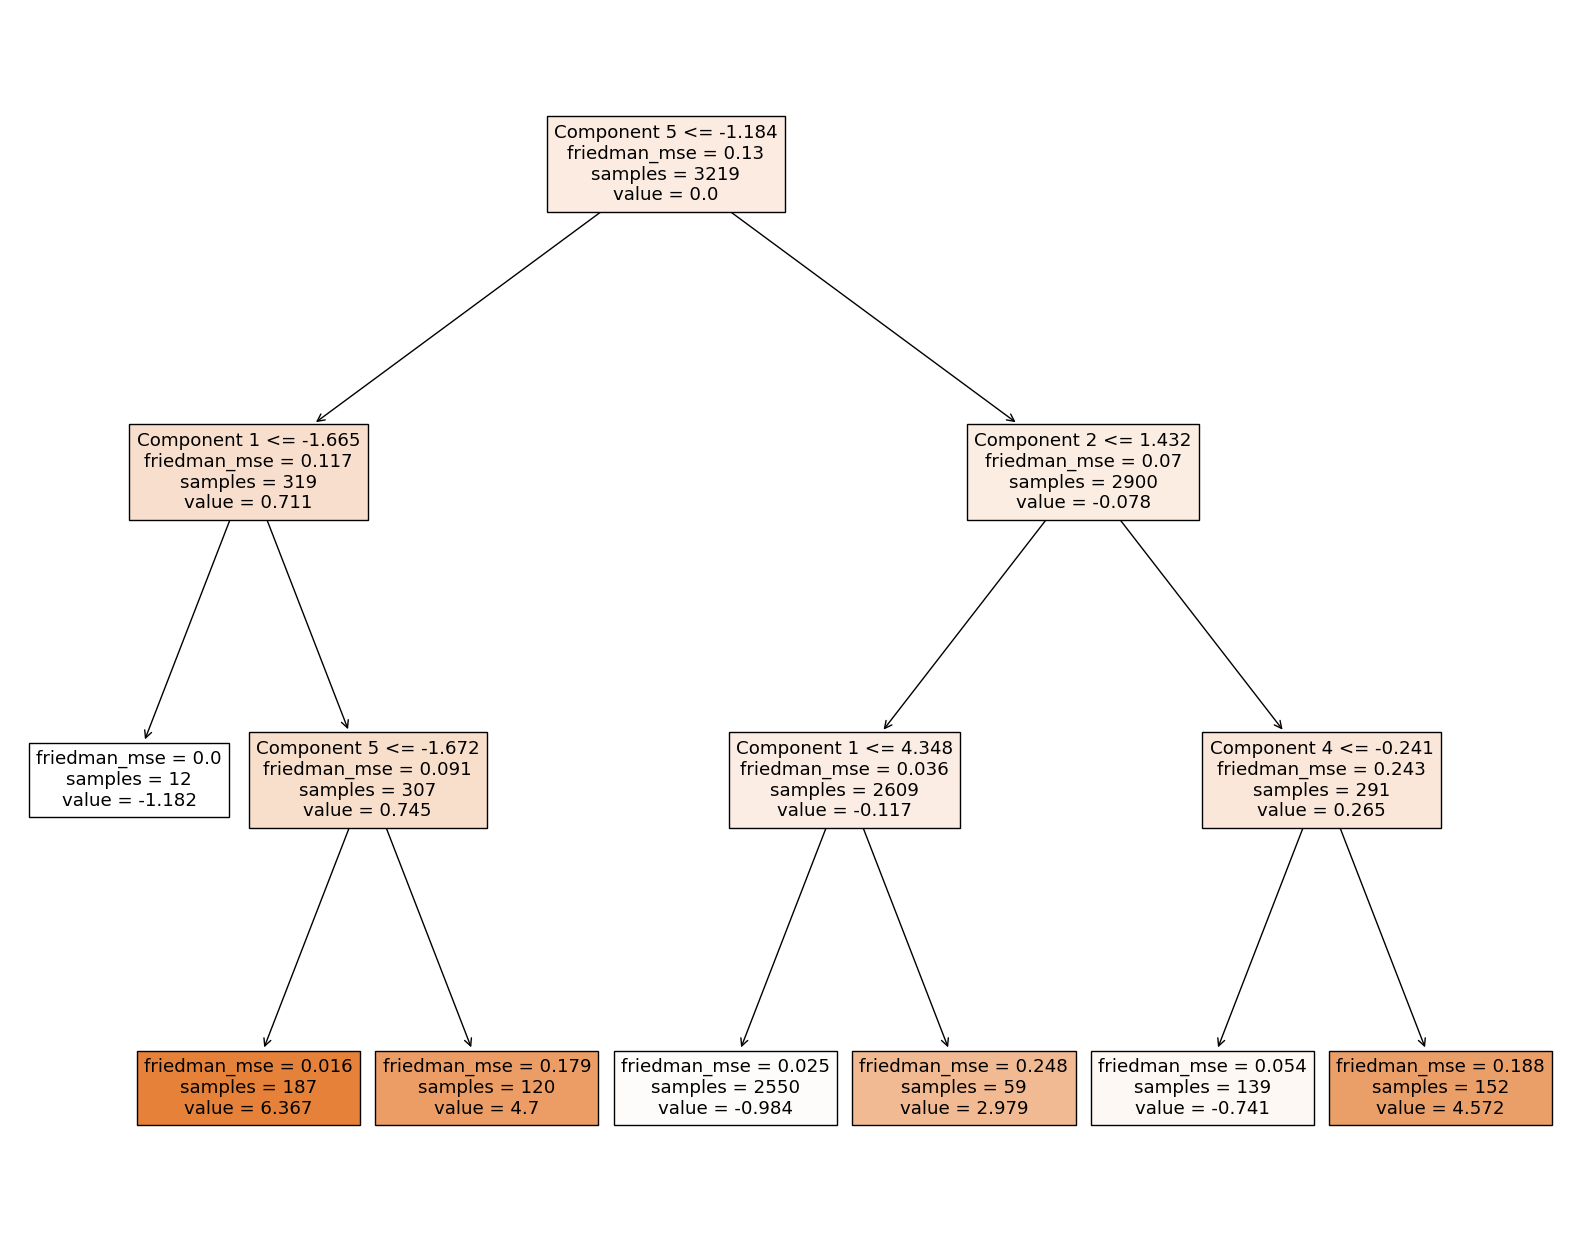

In [ ]:
plt.figure(figsize=(20, 16))
plot_tree(gb_classifier.estimators_[0, 0], filled=True, feature_names=feature_names)
plt.show()

####Logistic regression:

In [ ]:
# Initialize and train the Logistic Regression classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred_logistic = logistic_classifier.predict(X_test)

# Calculate accuracy for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)


Logistic Regression Accuracy: 0.9801242236024845


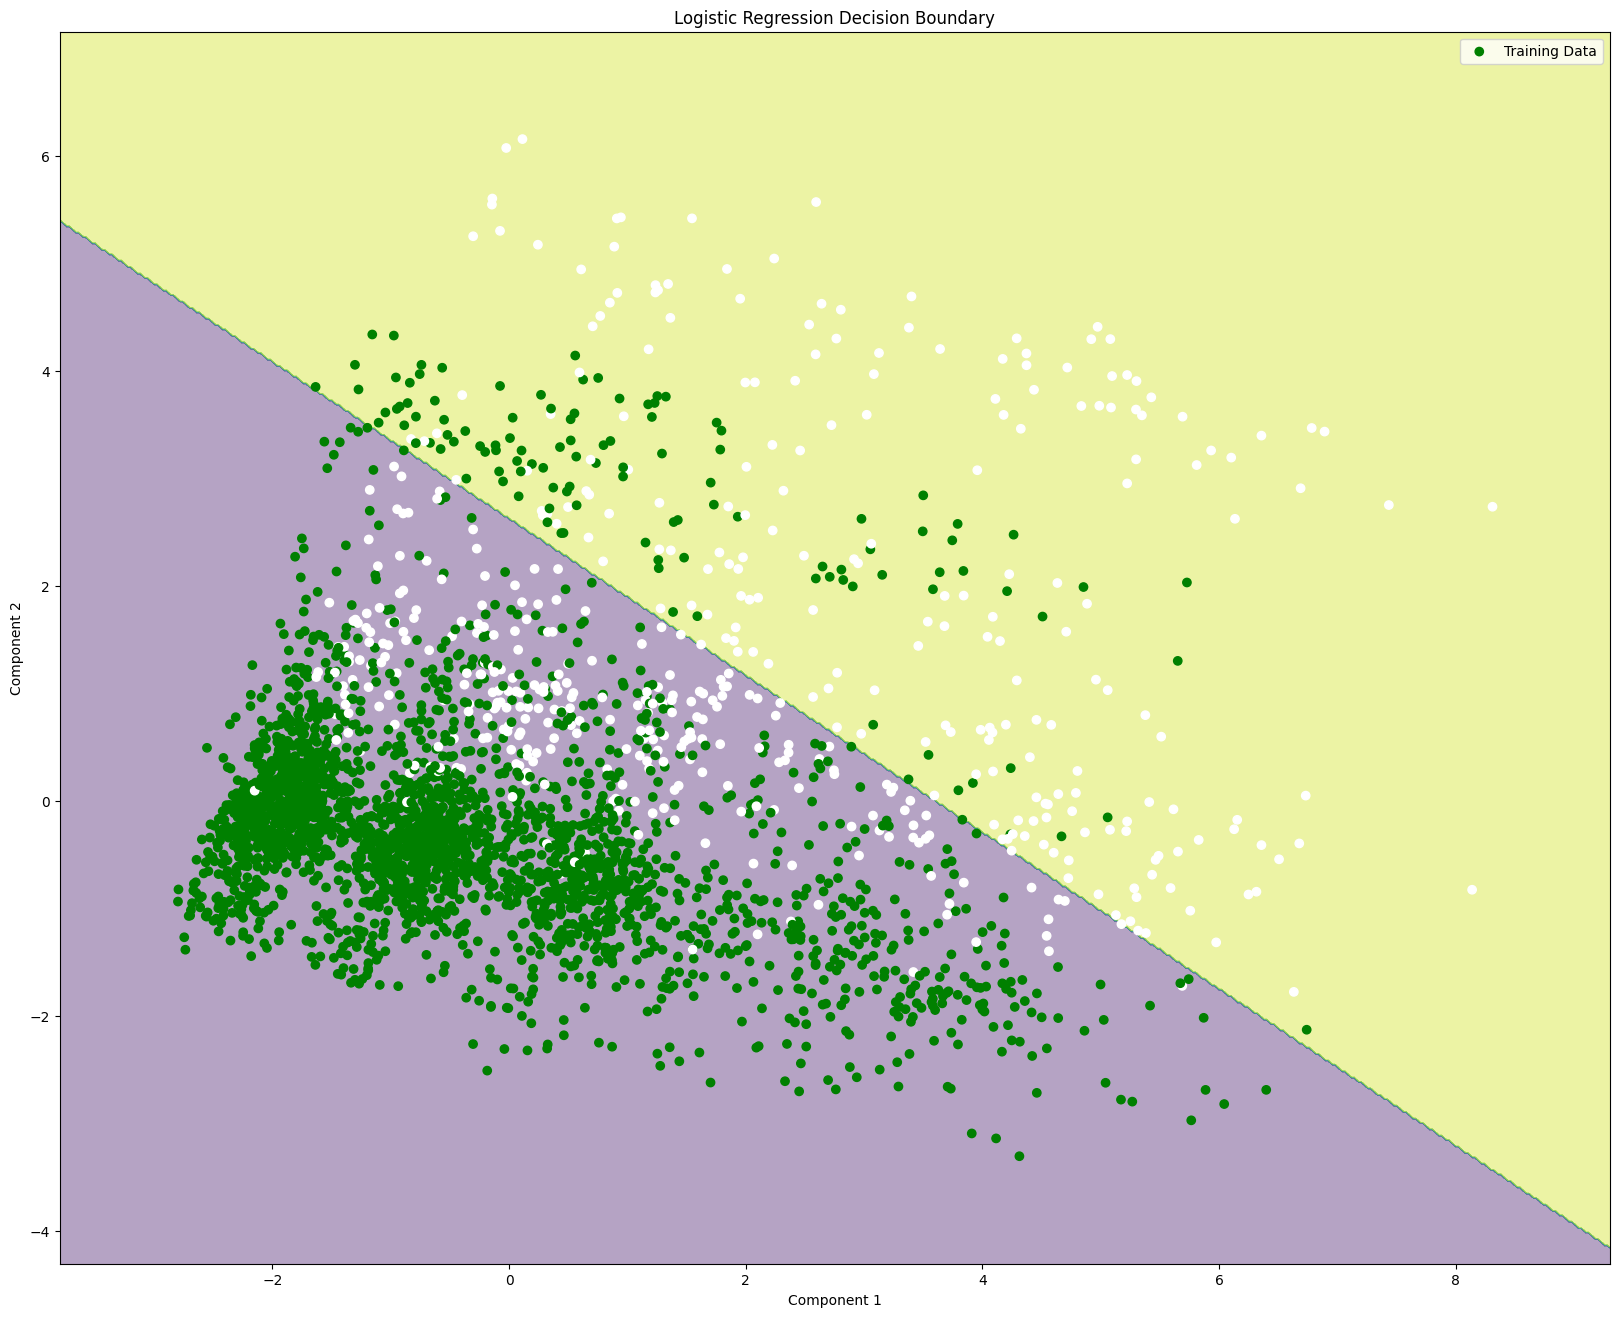

In [ ]:
# Function to plot decision boundary
def plot_decision_boundary_logistic(X, y, classifier, ax, feature_index1=0, feature_index2=1):
    # Plot the decision boundary. For that, we will assign a color to each point in the mesh
    h = .02  # step size in the mesh
    x_min, x_max = X[:, feature_index1].min() - 1, X[:, feature_index1].max() + 1
    y_min, y_max = X[:, feature_index2].min() - 1, X[:, feature_index2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plot the decision boundary for Logistic Regression
fig = plt.figure(figsize=(20, 16))
ax_logistic_decision_boundary = fig.add_subplot(111)

# Train the logistic regression classifier again for visualization
logistic_classifier.fit(X_train[:, :2], y_train)  # Use only the first two principal components for visualization

# Plot decision boundary
plot_decision_boundary_logistic(X_train[:, :2], y_train, logistic_classifier, ax_logistic_decision_boundary)

# Plot training data
ax_logistic_decision_boundary.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='ocean', marker='o', label='Training Data')
ax_logistic_decision_boundary.set_xlabel('Component 1')
ax_logistic_decision_boundary.set_ylabel('Component 2')
ax_logistic_decision_boundary.set_title('Logistic Regression Decision Boundary')
ax_logistic_decision_boundary.legend()

# Show plot
plt.show()


####Naive bayes

Accuracy: 0.8745341614906832


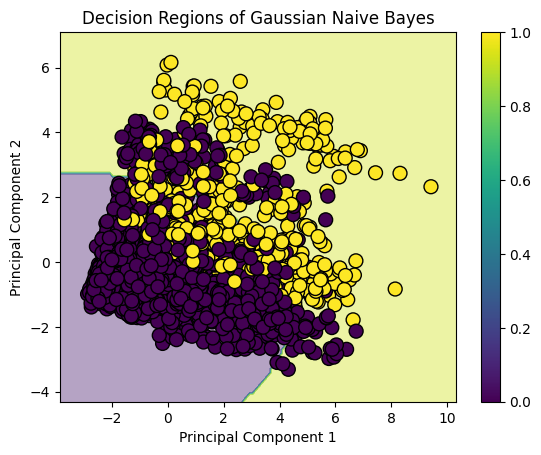

In [ ]:
# Assuming 'df' is your DataFrame containing the data
X = df.drop(columns=["Status_encoded"])  # Features
y = df["Status_encoded"]  # Target

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict labels for the test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision regions
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = nb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions of Gaussian Naive Bayes')
plt.colorbar()
plt.show()


### Supervised Learning Algorithm Comparison for Classification

In [ ]:
pca = PCA(n_components=5)  # Use 5 principal components
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_linear = SVC(kernel='linear')
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

classifiers = {
    'SVM Linear': svm_linear,
    'KNN': knn,
    'Logistic Regression': logistic_regression,
    'decision_tree' : decision_tree,
    'naive_bayes' : naive_bayes
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

SVM Linear: Accuracy = 0.9801242236024845

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       685
           1       0.92      0.95      0.93       120

    accuracy                           0.98       805
   macro avg       0.96      0.97      0.96       805
weighted avg       0.98      0.98      0.98       805


Confusion Matrix:
[[675  10]
 [  6 114]]
KNN: Accuracy = 0.9875776397515528

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       685
           1       0.95      0.97      0.96       120

    accuracy                           0.99       805
   macro avg       0.97      0.98      0.98       805
weighted avg       0.99      0.99      0.99       805


Confusion Matrix:
[[679   6]
 [  4 116]]
Logistic Regression: Accuracy = 0.9801242236024845

Classification Report:
              precision    recall  f1-score   support

       

une comparaison détaillée des performances des algorithmes d'apprentissage supervisé pour la classification:

* SVM Linéaire :
Précision (Accuracy) : 98.01%
Avantages : Bonne précision avec un équilibre entre précision et rappel pour les deux classes.
Inconvénients : Légèrement inférieur en précision par rapport à d'autres modèles.

* KNN (K plus proches voisins) :
Précision (Accuracy) : 98.76%
Avantages : Très haute précision avec un rappel élevé pour les deux classes.
Inconvénients : Peut être sensible au choix du nombre de voisins et peut être coûteux en termes de calcul pour de grandes bases de données.

* Régression Logistique :
Précision (Accuracy) : 98.01%
Avantages : Bonne précision avec des mesures de performance équilibrées pour les deux classes.
Inconvénients : Peut ne pas fonctionner efficacement avec des relations non linéaires entre les fonctionnalités et les étiquettes de classe.

* Arbre de Décision :
Précision (Accuracy) : 97.76%
Avantages : Bonne précision globale avec un équilibre entre précision et rappel pour les deux classes.
Inconvénients : Peut être sujet au surapprentissage et ne pas généraliser aussi bien que d'autres modèles.

* Naive Bayes Gaussien :
Précision (Accuracy) : 96.52%
Avantages : Performances acceptables avec un rappel raisonnable pour la classe majoritaire.
Inconvénients : Moins précis que les autres modèles, en particulier pour la classe minoritaire, et suppose l'indépendance des caractéristiques.

##unsupervised learning

###Clusetring using K-means:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


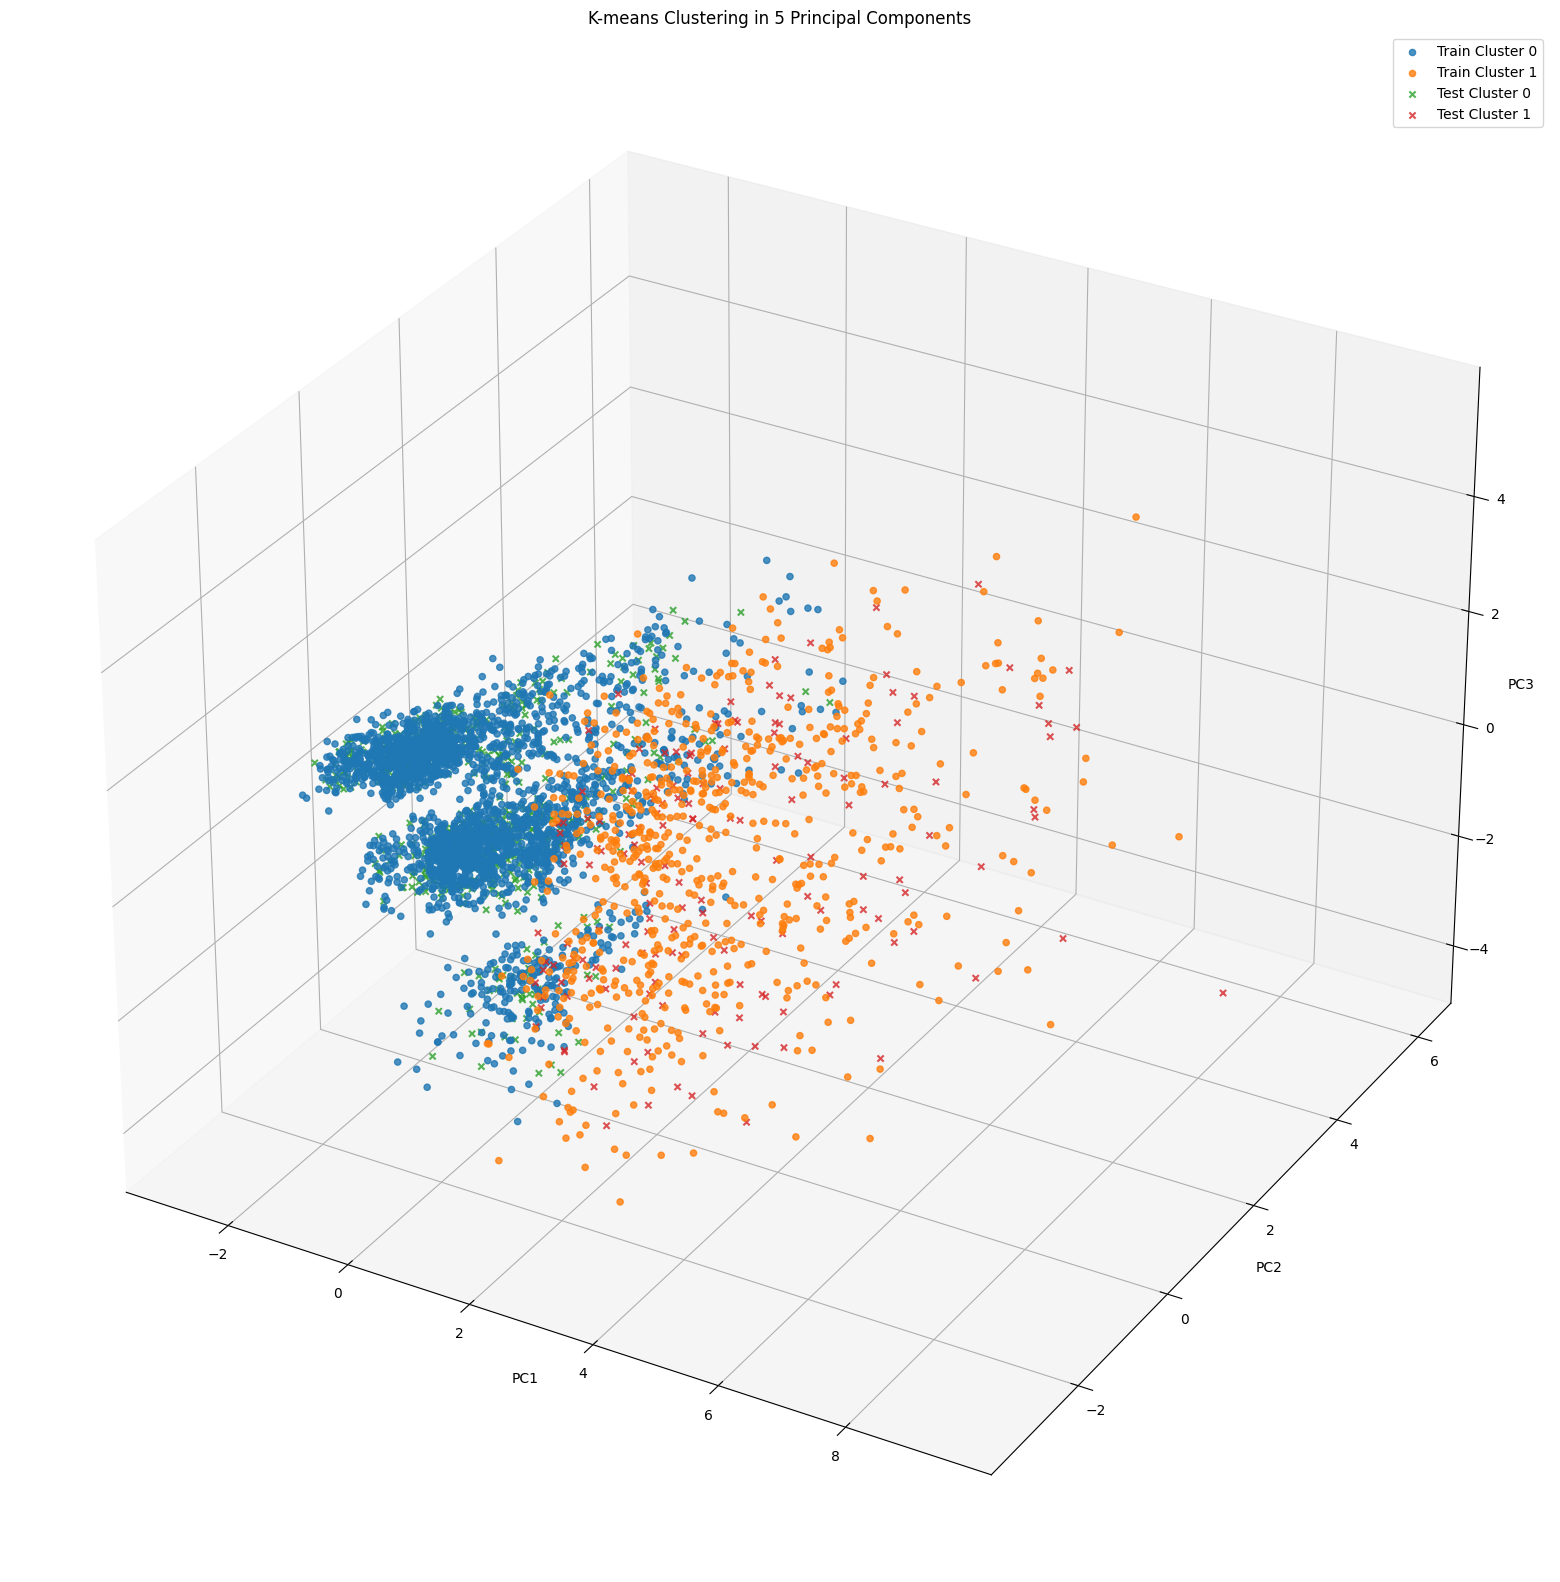

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Perform PCA with 5 components on both training and test data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters as needed

# Fit KMeans to the training data
kmeans.fit(X_train_pca)

# Get the cluster labels for training data
train_cluster_labels = kmeans.labels_

# Use the fitted KMeans model to predict clusters for the test data
test_cluster_labels = kmeans.predict(X_test_pca)

# Plotting the clusters in the 5 principal components
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')  # 3D scatter plot

# Scatter plot for each cluster in training data
for cluster_label in range(len(set(train_cluster_labels))):
    cluster_mask = train_cluster_labels == cluster_label
    ax.scatter(X_train_pca[cluster_mask, 0], X_train_pca[cluster_mask, 1], X_train_pca[cluster_mask, 2],
               label=f'Train Cluster {cluster_label}', alpha=0.8)

# Scatter plot for each cluster in test data
for cluster_label in range(len(set(test_cluster_labels))):
    cluster_mask = test_cluster_labels == cluster_label
    ax.scatter(X_test_pca[cluster_mask, 0], X_test_pca[cluster_mask, 1], X_test_pca[cluster_mask, 2],
               label=f'Test Cluster {cluster_label}', alpha=0.8, marker='x')

ax.set_title('K-means Clustering in 5 Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()


In [ ]:
# Calculate inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Calculate silhouette score for training data
silhouette_train = silhouette_score(X_train, train_cluster_labels)
print("Silhouette Score (Training):", silhouette_train)

# Calculate silhouette score for test data
silhouette_test = silhouette_score(X_test, test_cluster_labels)
print("Silhouette Score (Test):", silhouette_test)


Inertia: 22581.074238675108
Silhouette Score (Training): 0.27201751090666343
Silhouette Score (Test): 0.29225451161992405


* *Inertie: L'inertie mesure à quel point les clusters sont compacts et séparés les uns des autres. Elle est calculée comme la somme des distances au carré des échantillons à leur centre de cluster le plus proche. Une inertie plus faible indique un meilleur regroupement. Dans notre cas, l'inertie est de 22581.07, ce qui indique que les clusters ne sont pas très compacts ou bien séparés les uns des autres.
* Score de silhouette: Le score de silhouette mesure à quel point chaque échantillon est bien regroupé. Il varie de -1 à 1, où un score de silhouette élevé indique que l'échantillon est bien adapté à son propre cluster et mal adapté aux clusters voisins. Pour nos données d'entraînement, le score de silhouette est de 0.27, tandis que pour les données de test, il est de 0.29. Ces valeurs suggèrent que les échantillons sont modérément bien regroupés.






# IA Explicable (IAE)

Analyse de l'importance des caractéristiques avec SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from xgboost import XGBRegressor
import shap


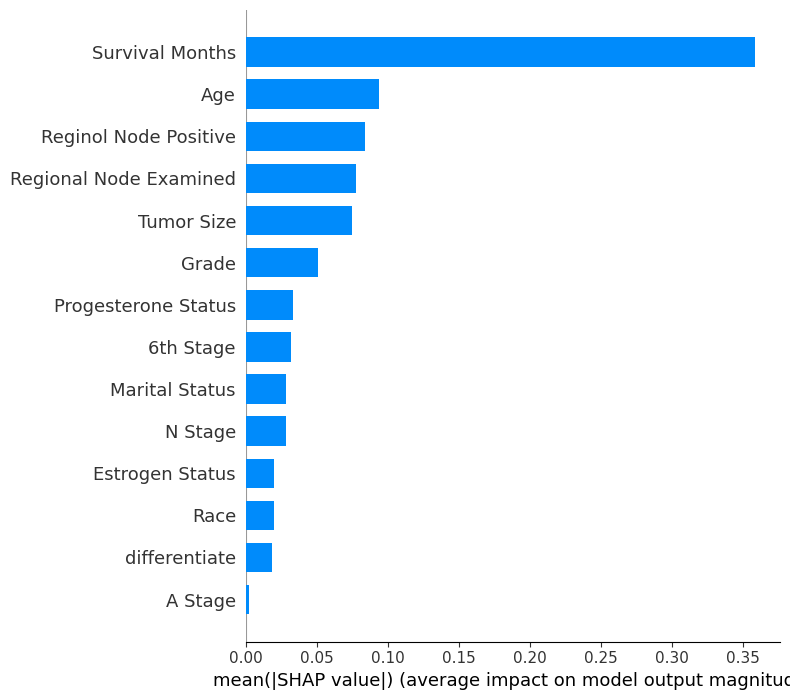

In [ ]:
# Assurez-vous que les colonnes d'entrée correspondent à celles décrites
X = df[['Age', 'Race', 'Marital Status', 'N Stage', '6th Stage',
        'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
        'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive',
        'Survival Months']]
y = df[['Status']]  # Variable cible

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciez et entraînez le modèle XGBoost
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

# Utilisez SHAP pour expliquer les prédictions du modèle
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Analysez les valeurs SHAP
shap.summary_plot(shap_values, X_test, plot_type='bar')  # Summary plot for feature importance


D'après le graphique ci-dessus, nous observons que les 'Survival Months' et l''Age' sont les caractéristiques qui ont le plus contribué à la prédiction du modèle.

# Conclusion

Ce projet exhaustif nous a permis d'explorer en profondeur les données du Programme SEER de l'Institut National du Cancer, tout en développant à la fois des modèles supervisés et non supervisés pour prédire la survie au cancer. De plus, nous avons intégré des techniques d'Interprétabilité de l'IA (IA explicable) pour mieux comprendre les prédictions de nos modèles.

Les modèles de classification supervisée ont démontré des performances prometteuses dans la prédiction de la survie des patients, mettant en évidence l'importance de facteurs tels que l'âge, le stade du cancer et les traitements reçus. Parallèlement, les techniques de clustering non supervisées ont révélé des sous-groupes de patients avec des profils de survie distincts, offrant ainsi des perspectives précieuses pour une prise en charge plus personnalisée de la maladie.

L'ajout de l'Interprétabilité de l'IA a enrichi notre analyse en fournissant des explications claires sur les prédictions de nos modèles. En utilisant des outils tels que SHAP et LIME, nous avons pu identifier les caractéristiques les plus influentes dans nos modèles et comprendre comment ces caractéristiques contribuent aux résultats prédictifs.

En résumé, ce projet a combiné des analyses de pointe avec des techniques d'IA explicable pour améliorer notre compréhension de la survie au cancer et ouvrir de nouvelles perspectives pour la prise en charge des patients. Ces résultats pourraient avoir un impact significatif sur la recherche en oncologie et la pratique clinique, en aidant à identifier les meilleurs traitements et à améliorer les résultats pour les patients atteints de cancer.